In [1]:
# Chargement des librairies
import datetime
import sys
import time
from datetime import datetime
import warnings
import numpy as np
import pandas as pd
import os
import pickle

import matplotlib.pyplot as plt

%run "functions_projet7.ipynb"

# Warnings
warnings.filterwarnings('ignore')

# Versions
print('Version des librairies utilisées :')
print('Python                : ' + sys.version)
print('NumPy                 : ' + np.version.full_version)
print('Pandas                : ' + pd.__version__)
now = datetime.now().isoformat()
print('Lancé le           : ' + now)

Version des librairies utilisées :
Python                : 3.9.19 (main, Mar 21 2024, 17:21:27) [MSC v.1916 64 bit (AMD64)]
NumPy                 : 1.26.4
Pandas                : 2.2.1
Lancé le           : 2024-05-03T09:55:39.185148


In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.dummy import DummyClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

import optuna

from imblearn.over_sampling import SMOTE, BorderlineSMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

import mlflow
import mlflow.sklearn

## <span style='background:Thistle'>Chargement des jeux de données</span>

**Chargement des dataframes issus du pré-processing**

<span style='background:Moccasin'>**Train_set/test_set**</span>

- **train_set** : jeu de données étiquetté (variable cible = TARGET) du train set, issu de la phase de pré-processing (nettoyage, gestion des valeurs manquantes, gestion des valeurs aberrantes, encodage, merge de tous les fichiers, feature engineering et feature sélection).

- **test_set** : jeu de données non étiquetté (sans la variable cible TARGET) du test set, issu de la phase de pré-processing (nettoyage, gestion des valeurs manquantes, gestion des valeurs aberrantes, encodage, merge de tous les fichiers, feature engineering et feature sélection).

In [3]:
path = 'C:/Users/matis/Desktop/Data_Scientist_OpenClassRooms/Projet_7/'

fic_sav_test_set = path + 'sauvegarde/features-selection/test_set.pickle'
# Chargement de test_set
with open(fic_sav_test_set, 'rb') as df_appli_test_set:
    features_test_set = pickle.load(df_appli_test_set)
features_test_set.shape

(48744, 231)

In [4]:
fic_sav_train_set = path + 'sauvegarde/features-selection/train_set.pickle'
# Chargement de train_set
with open(fic_sav_train_set, 'rb') as df_appli_train_set:
    features_train_set = pickle.load(df_appli_train_set)
features_train_set.shape

(307507, 232)

In [5]:
fic_sav_test_set_small = path + 'sauvegarde/features-selection/test_set_small.pickle'
# Chargement de test_set_small
with open(fic_sav_test_set_small, 'rb') as df_appli_test_set_small:
    features_test_set_small = pickle.load(df_appli_test_set_small)
features_test_set_small.shape

fic_sav_train_set_small = path + 'sauvegarde/features-selection/train_set_small.pickle'
# Chargement de train_set_small
with open(fic_sav_train_set_small, 'rb') as df_appli_train_set_small:
    features_train_set_small = pickle.load(df_appli_train_set_small)
features_train_set_small.shape

(307507, 79)

In [6]:
fic_df_results = path + 'sauvegarde/modelisation/df_resultat_scores.pickle'
# Chargement de test_imp2_set
with open(fic_df_results, 'rb') as df_resultats:
    df_resultats = pickle.load(df_resultats)
df_resultats

fic_df_taux = path + 'sauvegarde/modelisation/df_taux.pickle'
# Chargement de test_imp2_set
with open(fic_df_taux, 'rb') as df_taux:
    df_taux = pickle.load(df_taux)
df_taux

Modèle    FN     FP     TP     TN
0               lgbm_hyperparam_base  4755    153    210  56384
1           lgbm_hyperparam_base_bal  1570  15032   3395  41505
2           lgbm_hyperparam_base_std  4766    173    199  56364
3       lgbm_hyperparam_base_std_bal  1516  15054   3449  41483
4        lgbm_hyperparam_base_minmax  4746    157    219  56380
5        lgbm_hyperparam_base_robust  4750    147    215  56390
6         lgbm_smote_hyperparam_base  4906    168  51631  56369
7   lgbm_smote_hyperparam_base_train  4755    153    210  56384
8                lgbm_smote_base_bal  4906    168  51631  56369
9                  lgbm_optuna_opt_1  1617  14209   3348  42328
10                 lgbm_optuna_opt_2  1670  13068   3295  43469
11                 lgbm_optuna_opt_3  2176   9840   2789  46697
12                 lgbm_optuna_opt_4  1624  14112   3341  42425
13                 lgbm_optuna_opt_5  1481  16673   3484  39864
14                lgbm_optuna_opt_F1  2229   9425   2736  47112
15                lgbm_optuna_opt_F5  1516  15432   3449  41105
16         lgbm_smote_base_bal_train  1570  15032   3395  41505
17           lgbm_optuna_smote_opt_7  4804    229  51733  56308
18     lgbm_optuna_smote_opt_7_train  4679    270    286  56267
19           lgbm_optuna_smote_opt_6  4658    724  51879  55813
20     lgbm_optuna_smote_opt_6_train  4494    919    471  55618
21                 lgbm_smote_base_1  4885    170  51652  56367
22           lgbm_smote_base_1_train  4755    153    210  56384
23           lgbm_optuna_smote_opt_8  4798    236  51739  56301
24     lgbm_optuna_smote_opt_8_train  4670    281    295  56256
25             lgbm_smote_combi_base  2833   1167   2820  10139
26       lgbm_smote_combi_base_train  4755    153    210  56384
27           lgbm_optuna_smote_opt_9  2829   1196   2824  10110
28     lgbm_optuna_smote_opt_9_train  4761    145    204  56392
29          lgbm_optuna_smote_opt_10  2789   1235   2864  10071
30    lgbm_optuna_smote_opt_10_train  4690    244    275  56293

## <span style='background:Thistle'>Première idée sur les modèles</span>

In [8]:
def echantillonage(df_X, df_y):
    X = df_X.copy()
    y = df_y.copy()
    
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)
    
    return X_train, X_valid, y_train, y_valid

df_X = features_train_set.drop('TARGET', axis=1)
df_y = features_train_set['TARGET']
train_set, val_set, train_labels, val_labels = echantillonage(df_X,df_y)

print(train_set.shape, val_set.shape, train_labels.shape, val_labels.shape)

(246005, 231) (61502, 231) (246005,) (61502,)


In [9]:
train_set['TARGET']=train_labels
val_set['TARGET']=val_labels

In [10]:
train_set = train_set.reset_index()

In [11]:
sample_X = features_train_set.drop(columns = 'TARGET').sample(n= 50000)
sample_y = features_train_set['TARGET'][sample_X.index]

train_sample_set, val_sample_set, train_sample_labels, val_sample_labels = echantillonage(sample_X,sample_y)

In [12]:
train_sample_set['TARGET']=train_sample_labels
val_sample_set['TARGET']=val_sample_labels


train_sample_set = train_sample_set.reset_index()

In [13]:
print('train shape :',train_set.shape)
print('validation shape :',val_set.shape)


print('train sample shape :',train_sample_set.shape)
print('validation sample shape :',val_sample_set.shape)

train shape : (246005, 233)
validation shape : (61502, 232)
train sample shape : (40000, 233)
validation sample shape : (10000, 232)


In [14]:
# Dictionnaire de classifieurs 
classifieurs = {'Dummy Classifier': DummyClassifier(),
                'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=1000),
                'LGBM': LGBMClassifier(),
                'CatBoost': CatBoostClassifier(verbose=0),
                'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
               }

Training and evaluating Dummy Classifier


2024/05/03 09:59:15 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.9.2, required: mlflow==2.12.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/05/03 09:59:17 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.9.2, required: mlflow==2.12.1)
To fix the mismatches, call `mlflow.pyfunc.get_model_dependencies(model_uri)` to fetch the model's environment and install dependencies using the resulting environment file.
2024/05/03 09:59:19 WARNING mlflow.utils.requirements_utils: Detected one or more mismatches between the model's dependencies and the current Python environment:
 - mlflow (current: 2.9.2, required: mlflow==2.12.1)
To fix 

Finished training Dummy Classifier. Duration: 13.02 seconds


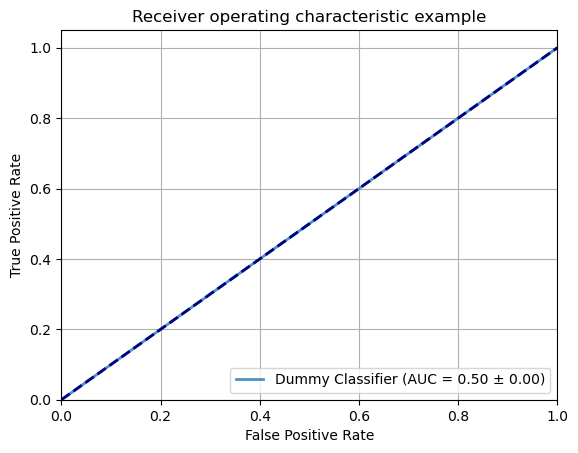

Model  Accuracy  AUC  Precision  Recall  F1 Score  Duration (s)
0  Dummy Classifier   0.92145  0.5        0.0     0.0       0.0     13.018212

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold

def plot_roc_curve(classifiers, X, y, n_splits=5):
    results = []
    kf = KFold(n_splits=n_splits)

    for name_clf, clf in classifiers.items():
        print(f'Training and evaluating {name_clf}')
        tprs = []
        aucs = []
        accs = []
        precs = []
        recs = []
        f1s = []
        mean_fpr = np.linspace(0, 1, 100)

        start_time = time.time()  # Start time of model training and evaluation

        for i, (train, test) in enumerate(kf.split(X)):

            with mlflow.start_run():
                clf.fit(X.iloc[train], y.iloc[train])
                y_pred = clf.predict(X.iloc[test])
                y_proba = clf.predict_proba(X.iloc[test])[:, 1]
    
                fpr, tpr, thresholds = roc_curve(y.iloc[test], y_proba)
                interp_tpr = np.interp(mean_fpr, fpr, tpr)
                interp_tpr[0] = 0.0
                tprs.append(interp_tpr)
                roc_auc = roc_auc_score(y.iloc[test], y_proba)
                aucs.append(roc_auc)
    
                # Calculate other metrics
                acc = accuracy_score(y.iloc[test], y_pred)
                prec = precision_score(y.iloc[test], y_pred)
                rec = recall_score(y.iloc[test], y_pred)
                f1 = f1_score(y.iloc[test], y_pred)
                accs.append(acc)
                precs.append(prec)
                recs.append(rec)
                f1s.append(f1)
                mlflow.log_metric("accuracy", acc)
                mlflow.log_metric("precision", prec)
                mlflow.log_metric("recall", rec)
                mlflow.log_metric("f1", f1)
                mlflow.sklearn.log_model(clf, "model")

        total_time = time.time() - start_time  # Total time for training and evaluation
        mean_tpr = np.mean(tprs, axis=0)
        mean_tpr[-1] = 1.0
        mean_auc = np.mean(aucs)
        std_auc = np.std(aucs)
        plt.plot(mean_fpr, mean_tpr,
                 label=f'{name_clf} (AUC = {mean_auc:.2f} ± {std_auc:.2f})',
                 lw=2, alpha=.8)

        results.append({
            'Model': name_clf,
            'Accuracy': np.mean(accs),
            'AUC': np.mean(aucs),
            'Precision': np.mean(precs),
            'Recall': np.mean(recs),
            'F1 Score': np.mean(f1s),
            'Duration (s)': total_time  # Store duration
        })
        
        print(f"Finished training {name_clf}. Duration: {total_time:.2f} seconds")

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)  # Enable grid
    plt.show()

    results_df = pd.DataFrame(results)
    return results_df

# Usage of the function
results_df = plot_roc_curve(classifieurs, train_sample_set.drop('TARGET', axis=1), train_sample_labels, n_splits = 5)
results_df


**Test jeu de données réduit**

In [61]:
df_X_small = features_train_set_small.drop('TARGET', axis=1)
df_y_small = features_train_set_small['TARGET']
train_set_small, val_set_small, train_labels_small, val_labels_small = echantillonage(df_X_small, df_y_small)

print(train_set_small.shape, val_set_small.shape, train_labels_small.shape, val_labels_small.shape)

(246005, 78) (61502, 78) (246005,) (61502,)


In [62]:
train_set_small['TARGET' ]= train_labels_small
val_set_small['TARGET'] = val_labels_small

In [63]:
train_set_small = train_set_small.reset_index()

In [64]:
sample_X_small = features_train_set_small.drop(columns = 'TARGET').sample(n= 50000)
sample_y_small = features_train_set_small['TARGET'][sample_X_small.index]

train_sample_set_small, val_sample_set_small, train_sample_labels_small, val_sample_labels_small = echantillonage(sample_X_small, sample_y_small)

In [65]:
train_sample_set_small['TARGET']=train_sample_labels_small
val_sample_set_small['TARGET']=val_sample_labels_small

train_sample_set_small = train_sample_set_small.reset_index()

In [66]:
print('train small shape :', train_set_small.shape)
print('validation small shape :', val_set_small.shape)

print('train sample small shape :', train_sample_set_small.shape)
print('validation sample small shape :', val_sample_set_small.shape)

train small shape : (246005, 80)
validation small shape : (61502, 79)
train sample small shape : (40000, 80)
validation sample small shape : (10000, 79)


Training and evaluating Dummy Classifier
Finished training Dummy Classifier. Duration: 0.18 seconds
Training and evaluating Logistic Regression
Finished training Logistic Regression. Duration: 27.63 seconds
Training and evaluating LGBM
[LightGBM] [Info] Number of positive: 2545, number of negative: 29455
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16136
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 79
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.079531 -> initscore=-2.448733
[LightGBM] [Info] Start training from score -2.448733
[LightGBM] [Info] Number of positive: 2593, number of negative: 29407
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006564 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 16137
[Li

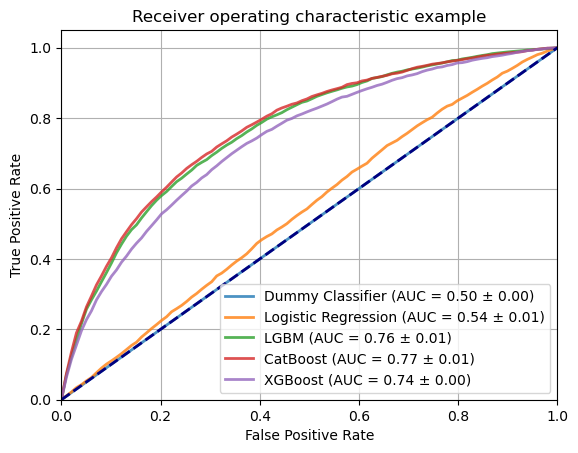

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   

   Duration (s)  
0      0.175483  
1     27.631778  
2      4.196934  
3     97.189080  
4      4.931715

In [67]:
# Usage of the function
results_df_small = plot_roc_curve(classifieurs, train_sample_set_small.drop('TARGET', axis=1), train_sample_labels_small, n_splits = 5)
results_df_small

In [69]:
results_df_small['Data'] = 'train_set_small'
results_df_small

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   

   Duration (s)             Data  
0      0.175483  train_set_small  
1     27.631778  train_set_small  
2      4.196934  train_set_small  
3     97.189080  train_set_small  
4      4.931715  train_set_small

In [70]:
results_df['Data'] = 'train_set'
results_df

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   

   Duration (s)       Data  
0      0.307689  train_set  
1     77.093539  train_set  
2      8.444921  train_set  
3    174.459858  train_set  
4     12.148802  train_set

In [76]:
df_compare = pd.concat([results_df, results_df_small])
df_compare

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   

   Duration (s)             Data  
0      0.307689        train_set  
1     77.093539        train_set  
2      8.444921        train_set  
3    174.459858        train_set  
4     12.148802        train_set  
0      0.175483  train_set_small  
1     27.631778  train_set_small  
2      4.196934  train_set_small  
3     97.189080  train_set_small  
4      4.931715  train_set_small

**Bilan** : 
***
- **Modèles** : 
    - Catboost ,
    - LGBM,
    - XGBoost.
    - Observons les autres métriques pour départager nos 3 modèles.

- Pour notre problématique :
    - les **défaillants** forment la classe **positive**,
    - les **non-défaillants** forment la classe **négative**.

- Pour minimiser les pertes d'argent, nous devons :
    - nous efforcer de ne pas prédire un client non-défaillant s'il est défaillant ==> **minimiser le nombre de faux négatifs** (prédit non-défaillant mais client défaillant). Si un défaillant est prédit non défaillant, le groupe Home Crédit aura perdu toute la somme prêtée à l'emprunteur. Cela constitue les plus grosses pertes pour l'entreprise.
    - nous efforcer de ne pas prédire de défaillant si le client n'est pas défaillant donc **minimiser les faux positifs** (classe 1 défaillant alors que non-défaillant dans la réalité). Si un non-défaillant est prédit défaillant, le groupe Home Crédit aura perdu les intérêts de la somme prêtée à l'emprunteur.
    
- La métrique pour déterminer le **taux de vrais positif** est le Rappel/**Recall**, elle mesure parmi toutes les observations positives combien ont été classées comme positives. Pour ne pas avoir de pertes, il faut détecter tous les défaillants (classe positive) donc **maximiser la métrique recall**.
- La métrique **Precision**  mesure le nombre d'observations prédites comme positives (client défaillant) qui le sont en réalité. Si le client est prédit défaillant alors qu'il ne le sera pas le prêt ne sera pas accordé et les intérêts ne seront pas empochés. Il faut donc **maximiser la 'Precision'**.

***Note :***
***
- Si on augmente le recall, la précision diminue, il s'agit de faire un compromis entre ces 2 métriques qui dépendent l'une de l'autre, en prenant en compte le métier/problème de l'entreprise et les coûts associés pour répondre à ces questions.
- Dans notre cas, il faut trouver le plus grand nombre d'observations réellement positives (client prédit défaillant et bien défaillant) et la perte est moins grande si on prédit un client défaillant mais qu'il n'est pas défaillant (faux positifs), donc **on donnera priorité à maximiser le recall au dépend de la précision** (on parle bien de Precision pas d'accuracy).
- Le réglage du paramètre beta pour le Fbeta score permet de donner plus de poids au recall (beta>1) qu'à la précision (0<beta<1). Le score F1 est la moyenne harmonique entre le recall et la précision.

In [77]:
df_compare.sort_values(by = 'AUC', ascending = False)

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   

   Duration (s)             Data  
3     97.189080  train_set_small  
3    174.459858        train_set  
2      4.196934  train_set_small  
2      8.444921        train_set  
4      4.931715  train_set_small  
4     12.148802        train_set  
1     27.631778  train_set_small  
1     77.093539        train_set  
0      0.307689        train_set  
0      0.175483  train_set_small

- Léger avantage au modèle Catboost, Lightgbm et xgboost ont des résultats proches.

In [83]:
df_compare.sort_values(by = 'Recall', ascending = False)

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   

   Duration (s)             Data  
4      4.931715  train_set_small  
4     12.148802        train_set  
2      8.444921        train_set  
3    174.459858        train_set  
2      4.196934  train_set_small  
3     97.189080  train_set_small  
1     77.093539        train_set  
1     27.631778  train_set_small  
0      0.307689        train_set  
0      0.175483  train_set_small

- Le meilleur résultat est obtenu par Xgboost, suivi par LGBM avec un résultat 2 fois meilleur que pour LGBM mais le recall peut-être affiné en optimisant le modèle et le seuil de probabilité.
- Au niveau des jeux de données, avantage pour le train_set_small suivi par  le train_set mais les résultats sont assez proches pour tous les jeux de données.

In [89]:
df_compare.sort_values(by = 'Precision', ascending = False)

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   

   Duration (s)             Data  
3    174.459858        train_set  
2      8.444921        train_set  
2      4.196934  train_set_small  
3     97.189080  train_set_small  
4     12.148802        train_set  
4      4.931715  train_set_small  
1     27.631778  train_set_small  
1     77.093539        train_set  
0      0.307689        train_set  
0      0.175483  train_set_small

- Le meilleur résultat est obtenu par CatBoost, suivi par les 2 autres modèles qui ont des résultats proches.

In [86]:
df_compare.sort_values(by = 'Duration (s)', ascending = False)

Model  Accuracy       AUC  Precision    Recall  F1 Score  \
3             CatBoost  0.917425  0.764566   0.518995  0.032291  0.060738   
3             CatBoost  0.918375  0.770407   0.402878  0.029263  0.054443   
1  Logistic Regression  0.916450  0.526829   0.053846  0.002128  0.004094   
1  Logistic Regression  0.919275  0.537226   0.100000  0.000317  0.000632   
4              XGBoost  0.913975  0.728858   0.365516  0.054376  0.094637   
2                 LGBM  0.916750  0.757558   0.464498  0.037782  0.069820   
4              XGBoost  0.915650  0.737774   0.361076  0.059474  0.102074   
2                 LGBM  0.918325  0.763954   0.418634  0.030461  0.056688   
0     Dummy Classifier  0.917300  0.500000   0.000000  0.000000  0.000000   
0     Dummy Classifier  0.919350  0.500000   0.000000  0.000000  0.000000   

   Duration (s)             Data  
3    174.459858        train_set  
3     97.189080  train_set_small  
1     77.093539        train_set  
1     27.631778  train_set_small  
4     12.148802        train_set  
2      8.444921        train_set  
4      4.931715  train_set_small  
2      4.196934  train_set_small  
0      0.307689        train_set  
0      0.175483  train_set_small

- Lightgbm est le plus rapide, CatBoost est très lent
- Sans surprise les jeux de données avec moins de variables (small) ont des temps de réponse plus rapides.

**Bilan** :
***
- Les résultats sont meilleurs pour Catboost mais légèrement supérieur pour Xgboost par rapport à Lightgbm, mais le modèle Lightgbm est 7 fois plus rapide que Catboost. Puisque le but est un dashboard interactif, si de nouvelles données sont fournies ou si les données des clients évoluent, le temps d'exécution sera un facteur essentiel pour notre problématique.
- Les métriques peuvent être optimisées en jouant sur l'équilibrage du jeu de données, sur l'optimisation du modèle et sur le réglage du seuil de probabilité.
- Après analyse des résultats et des contraintes de notre problématique, **le modèle retenu sera Lightgbm**.

## <span style='background:Thistle'>Préparation du jeu de données</span>

In [7]:
# Nombre aléatoire pour la reproductibilité des résultats
seed = 21
print(f'Nombre aléatoire : {seed}')

Nombre aléatoire : 21


### <span style='background:PowderBlue'>Split du jeu d'entraînement en entraînement/validation</span>

In [8]:
# Vecteur y cible
y = features_train_set['TARGET']
print(f'y : {y.shape}')

y : (307507,)


In [9]:
# Matrice X
# Passage de l'identifiant du client en index pour la modélisation
features_train_set.set_index('SK_ID_CURR', inplace=True)
# Suppression de la variable cible pour la modélisation
X = features_train_set.drop(['TARGET'], axis=1)
print(f'X : {X.shape}')

X : (307507, 230)


In [10]:
# Découpage du jeu d'entraînement en :
# X_train : pour entraîner le modèle et trouver les meilleurs
#           hyperparamètres
# X_valid : pour évaluer les performances du modèle
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      test_size=0.2,
                                                      shuffle=True,
                                                      stratify=y,
                                                      random_state=seed)
print(f'X_train : {X_train.shape} - y_train : {y_train.shape}')
print(f'X_valid : {X_valid.shape} - y_valid : {y_valid.shape}')

X_train : (246005, 230) - y_train : (246005,)
X_valid : (61502, 230) - y_valid : (61502,)


## <span style='background:Thistle'>Choix des métriques</span>

### <span style='background:PowderBlue'>Métriques de classification binaire</span>

**Problématique**
***
- Pour notre problématique :
    - les **défaillants** forment la classe **positive**,
    - les **non-défaillants** forment la classe **négative**.
- Pour minimiser les pertes d'argent, nous devons :
    - nous efforcer de ne pas prédire un client non-défaillant s'il est défaillant ==> **minimiser le nombre de faux négatifs (erreur de type II)** (prédit non-défaillant mais client défaillant). Si un défaillant est prédit non défaillant, le groupe Home Crédit aura perdu toute la somme prêtée à l'emprunteur. Cela constitue les plus grosses pertes pour l'entreprise.
    - nous efforcer de ne pas prédire de défaillant si le client n'est pas défaillant donc **minimiser les faux positifs (erreur de type I)** (classe 1 défaillant alors que non-défaillant dans la réalité). Si un non-défaillant est prédit défaillant, le groupe Home Crédit aura perdu les intérêts de la somme prêtée à l'emprunteur.
    
**Métriques**
***
-  **Recall** : la métrique pour déterminer le **taux de vrais positif** est le Rappel(Sensibilité)/**Recall**, elle mesure parmi toutes les observations positives combien ont été classées comme positives. Pour ne pas avoir de pertes, il faut détecter tous les défaillants (classe positive) donc **maximiser la métrique recall**.

- **Precision** : elle mesure le nombre d'observations prédites comme positives (client défaillant) qui le sont en réalité. Si le client est prédit défaillant alors qu'il ne le sera pas le prêt ne sera pas accordé et les intérêts ne seront pas empochés. Il faut donc **maximiser la 'Precision'**.

- **F-mesure ou F1** : compromis entre le rappel et précision.
    -  Si on augmente le recall, la précision diminue, il s'agit de faire un compromis entre ces 2 métriques qui dépendent l'une de l'autre, en prenant en compte le métier/problème de l'entreprise et les coûts associés pour répondre à ces questions.
    - Dans notre cas, il faut trouver le plus grand nombre d'observations réellement positives (client prédit défaillant et bien défaillant) et la perte est moins grande si on prédit un client défaillant mais qu'il n'est pas défaillant (faux positifs), donc **on donnera priorité à maximiser le recall au dépend de la précision** (on parle bien de Precision pas d'accuracy).
    - Le réglage du paramètre beta pour le Fbeta score permet de donner plus de poids au recall (beta>1) qu'à la précision (0<beta<1). Le score F1 est la moyenne harmonique entre le recall et la précision.

- **Score ROC AUC** : le score ROC AUC est équivalent au calcul de la corrélation de rang entre les prédictions et la cible. Du point de vue de l'interprétation, il est plus utile car il nous indique que cette métrique montre à quel point votre modèle est bon pour classer les prédictions. Elle vous indique la probabilité qu'une instance positive choisie au hasard soit classée plus haut qu'une instance négative choisie au hasard.

- **Score PR AUC** : calcule de l'aire sous la courbe précision-rappel pour obtenir un nombre qui vous donne des informations sur la performance du modèle. A utiliser : 
    - lorsque vous voulez communiquer la décision de précision/rappel à d'autres parties prenantes et que vous voulez choisir le seuil qui correspond au problème de l'entreprise.
    - lorsque vos données sont fortement déséquilibrées. Puisque l'AUC de PR se concentre principalement sur la classe positive (PPV et TPR), elle se soucie moins de la classe négative fréquente.
    - quand vous vous souciez plus de la classe positive que de la classe négative. Si vous vous souciez davantage de la classe positive et donc du PPV et du TPR, vous devriez opter pour la courbe Precision-Recall et la PR AUC (précision moyenne).


**Notes :**
***
- La librairie sklearn permet de calculer tous ses scores.
- Une fonction permettra d calculer et de sauvegarder ses différents scores lors de la modélisation

### <span style='background:PowderBlue'>Métriques métiers</span>

**Score pénalisant les faux négatifs**
- Les métriques ci-dessus ne pénalisent pas les faux négatifs sauf le Fbeta qui en utilisant une valeur supérieure à 1 pénalise plus les faux négatifs.
- Nous allons donc créer une métrique métier tentant d'optimiser notre modèle de classification grâce à la personnalisation de la fonction de perte pour définir à la main le coût des faux positifs/négatifs et des vrais positifs/négatifs.

**Seuil de probabilité**
- La valeur du seuil de probabilité à 0.5 par défaut pourra également être réglée pour tenter d'optimiser les performances du modèles pour notre métrique métier. Le seuil optimal de bascule de la classe 0 à la classe 1 devra être déterminée pour chacun des modèles entraînés avec la métrique métier comme score.

## <span style='background:Thistle'>Modélisation</span>

In [10]:
df_resultats = pd.DataFrame({})

In [41]:
df_taux = pd.DataFrame({})

### <span style='background:PowderBlue'>Modèle LGBM de base</span>

**Sans rééquilibrage**

In [11]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base = LGBMClassifier(random_state=seed, verbose=0,
                           force_col_wise=True)

In [11]:
def afficher_matrice_confusion(y_true, y_pred, title):

    plt.figure(figsize=(6, 4))

    cm = confusion_matrix(y_true, y_pred)
    
    labels = ['Non défaillants', 'Défaillants']
    
    sns.heatmap(cm,
                xticklabels=labels,
                yticklabels=labels,
                annot=True,
                fmt='d',
                cmap=plt.cm.Blues)
    plt.title(f'Matrice de confusion de : {title}')
    plt.ylabel('Classe réelle')
    plt.xlabel('Classe prédite')
    plt.show()    

In [12]:
from sklearn.metrics import confusion_matrix, recall_score, fbeta_score, precision_score, roc_auc_score, average_precision_score
from sklearn.model_selection import cross_validate, RandomizedSearchCV, \
    GridSearchCV, learning_curve  # , cross_val_score

def process_classification(model, X_train, X_valid, y_train, y_valid,
                           df_resultats, titre, affiche_res=True,
                           affiche_matrice_confusion=True):
    """
    Lance un modele de classification binaire, effectue cross-validation
    et sauvegarde des scores.
    Parameters
    ----------
    model : modèle de classification initialisé, obligatoire.
    X_train : train set matrice X, obligatoire.
    X_valid : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_valid : test set, vecteur y, obligatoire.
    df_resultats : dataframe sauvegardant les scores, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    affiche_res : affiche le tableau de résultat (optionnel, True par défaut).
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle avec le jeu d'entraînement du jeu d'entrainement
    model.fit(X_train, y_train)

    # Sauvegarde du modèle de classification entraîné
    with open(path + 'sauvegarde/modelisation/modele_' + titre + '.pickle', 'wb') as f:
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    
    # Top fin d'exécution
    time_end_train = time.time()
    
    # Prédictions avec le jeu de validation du jeu d'entraînement
    y_pred = model.predict(X_valid)

    # Top fin d'exécution
    time_end = time.time()

    # Probabilités
    y_proba = model.predict_proba(X_valid)[:, 1]
    
    # Calcul des métriques
    # Rappel/recall sensibilité
    recall = recall_score(y_valid, y_pred)
    # Précision
    precision = precision_score(y_valid, y_pred)
    # F-mesure ou Fbeta
    f1_score = fbeta_score(y_valid, y_pred, beta=1)
    f5_score = fbeta_score(y_valid, y_pred, beta=5)
    f10_score = fbeta_score(y_valid, y_pred, beta=10)
    # Score ROC AUC aire sous la courbe ROC
    roc_auc = roc_auc_score(y_valid, y_proba)
    # Score PR AUC aire sous la courbe précion/rappel
    pr_auc = average_precision_score(y_valid, y_proba)
    # Métrique métier
    # banque_score = custom_score(y_valid, y_pred)
    banque_score = custom_score(y_valid, y_pred, 10)
    banque_score2 = custom_score2(y_valid, y_pred)

    # durée d'exécution d'entraînement
    time_exec_train = time_end_train - time_start
    # durée d'exécution entraînement + validation
    time_execution = time_end - time_start

    # cross validation
    scoring = ['roc_auc', 'recall', 'precision']
    scores = cross_validate(model, X_train, y_train, cv=10,
                            scoring=scoring, return_train_score=True)

    # Sauvegarde des performances
    nouveau_df = pd.DataFrame({
        'Modèle': [titre],
        'Recall': [recall],
        'Précision': [precision],
        'F1': [f1_score],
        'F5': [f5_score],
        'F10': [f10_score],
        'ROC_AUC': [roc_auc],
        'PR_AUC': [pr_auc],
        'Metier_score': [banque_score],
        'Metier_score2': [banque_score2],
        'Durée_train': [time_exec_train],
        'Durée_tot': [time_execution],
        # Cross-validation
        'Train_roc_auc_CV': [scores['train_roc_auc'].mean()],
        'Train_roc_auc_CV +/-': [scores['train_roc_auc'].std()],
        'Test_roc_auc_CV': [scores['test_roc_auc'].mean()],
        'Test_roc_auc_CV +/-': [scores['test_roc_auc'].std()],
        'Train_recall_CV': [scores['train_recall'].mean()],
        'Train_recall_CV +/-': [scores['train_recall'].std()],
        'Test_recall_CV': [scores['test_recall'].mean()],
        'Test_recall_CV +/-': [scores['test_recall'].std()],
        'Train_precision_CV': [scores['train_precision'].mean()],
        'Train_precision_CV +/-': [scores['train_precision'].std()],
        'Test_precision_CV': [scores['test_precision'].mean()],
        'Test_precision_CV +/-': [scores['test_precision'].std()],
    })

    df_resultats = pd.concat([df_resultats, nouveau_df], ignore_index=True)

    # Sauvegarde du tableau de résultat
    with open(path + 'sauvegarde/modelisation/df_resultat_scores.pickle', 'wb') as df:
        pickle.dump(df_resultats, df, pickle.HIGHEST_PROTOCOL)
    
    if affiche_res:
        mask = df_resultats['Modèle'] == titre
        display(df_resultats[mask])

    if affiche_matrice_confusion:
        afficher_matrice_confusion(y_valid, y_pred, titre)

    return df_resultats

In [13]:
def custom_score2(y_reel, y_pred, taux_tn=1, taux_fp=-1, taux_fn=-10, taux_tp=1):
    '''
    Métrique métier tentant de minimiser le risque d'accord prêt pour la
    banque en pénalisant les faux négatifs.
    Parameters
    ----------
    y_reel : classe réélle, obligatoire (0 ou 1).
    y_pred : classe prédite, obligatoire (0 ou 1).
    taux_tn : Taux de vrais négatifs, optionnel (1 par défaut),
              le prêt est remboursé : la banque gagne de l'argent.
    taux_fp : Taux de faux positifs, optionnel (-1 par défaut),
               le prêt est refusé par erreur : la banque perd les intérêts,
               manque à gagner mais ne perd pas réellement d'argent (erreur de
               type I).
    taux_fn : Taux de faux négatifs, optionnel (-10 par défaut),
              le prêt est accordé mais le client fait défaut : la banque perd
              de l'argent (erreur de type II)..
    taux_tp : Taux de vrais positifs, optionnel (1 par défaut),
              Le prêt est refusé à juste titre : la banque ne gagne ni ne perd
              d'argent.
    Returns
    -------
    score : gain normalisé (entre 0 et 1) un score élevé montre une meilleure
            performance
    '''
    # Matrice de Confusion
    (tn, fp, fn, tp) = confusion_matrix(y_reel, y_pred).ravel()
    # Gain total
    gain_tot = tn * taux_tn + fp * taux_fp + fn * taux_fn + tp * taux_tp
    # Gain maximum : toutes les prédictions sont correctes
    gain_max = (fp + tn) * taux_tn + (fn + tp) * taux_tp
    # Gain minimum : on accorde aucun prêt, la banque ne gagne rien
    gain_min = (fp + tn) * taux_fp + (fn + tp) * taux_fn
    
    custom_score = (gain_tot - gain_min) / (gain_max - gain_min)
    
    # Gain normalisé (entre 0 et 1) un score élevé montre une meilleure
    # performance
    return custom_score

In [14]:
def custom_score(y_reel, y_pred, poids):
    # Matrice de Confusion
    (tn, fp, fn, tp) = confusion_matrix(y_reel, y_pred).ravel()
    
    custom_score = poids*fn + fp
    
    return custom_score

Modèle    Recall  Précision        F1       F5       F10  \
0  lgbm_hyperparam_base  0.042296   0.578512  0.078829  0.04386  0.042688   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
0  0.781519  0.276539         47703       0.539149  ...         0.784181   

   Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
0             0.004946         0.059483             0.002252        0.040836   

   Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
0            0.004557            0.763636                0.006599   

   Test_precision_CV  Test_precision_CV +/-  
0           0.565895               0.043276  

[1 rows x 24 columns]

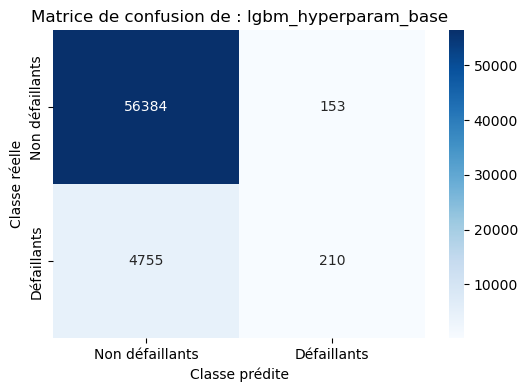

In [16]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base, X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_hyperparam_base')

In [15]:
def sauvegarder_taux(titre_modele, FN, FP, TP, TN, df_taux):
    """
    Lance un modele de classification binaire, effectue cross-validation
    et sauvegarde des scores.
    Parameters
    ----------
    model : modèle de lassification initialisé, obligatoire.
    FN : nombre de faux négatifs, obligatoire.
    FP : nombre de faux positifs, obligatoire.
    TN : train set vecteur y, obligatoire.
    TP : test set, vecteur y, obligatoire.
    df_taux : dataframe sauvegardant les taux, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    Returns
    -------
    df_taux : Le dataframe de sauvegarde des taux.
    """

    # Création d'un nouveau DataFrame avec les données à ajouter
    new_data = pd.DataFrame({
        'Modèle': [titre_modele],
        'FN': [FN],
        'FP': [FP],
        'TP': [TP],
        'TN': [TN]
    })

    # Utilisation de pd.concat pour ajouter les nouvelles données
    df_taux = pd.concat([df_taux, new_data], ignore_index=True)

    # Sauvegarde du tableau de résultat
    with open(path + 'sauvegarde/modelisation/df_taux.pickle', 'wb') as df:
        pickle.dump(df_taux, df, pickle.HIGHEST_PROTOCOL)
    
    return df_taux

In [42]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base',
                                        4755, 153, 210, 56384, df_taux)

**Avec rééquilibrage**

In [24]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base_bal = LGBMClassifier(random_state=seed, verbose=0,
                               force_col_wise=True,
                               class_weight='balanced')

Modèle    Recall  Précision       F1        F5      F10  \
1  lgbm_hyperparam_base_bal  0.683787   0.184241  0.29027  0.619213  0.66591   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
1  0.783201  0.280375         30732       0.709974  ...          0.78547   

   Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
1             0.003922         0.768356             0.001093        0.694058   

   Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
1            0.008323            0.204906                0.000461   

   Test_precision_CV  Test_precision_CV +/-  
1           0.185671               0.002194  

[1 rows x 24 columns]

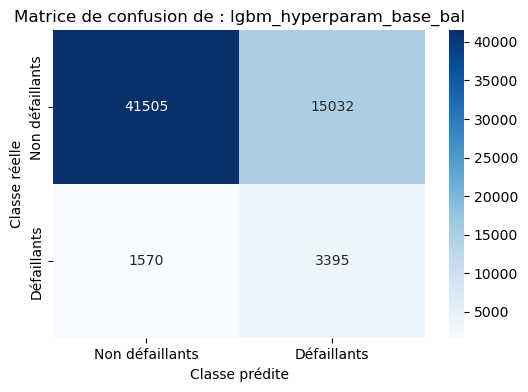

In [25]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base_bal, X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_hyperparam_base_bal')

In [43]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base_bal',
                            1570, 15032, 3395, 41505, df_taux)

### <span style='background:PowderBlue'>Optimisation LGBM - Standardisation</span>

<span style='background:Moccasin'>**Standardisation - StandardScaler**</span>

In [27]:
# StandardScaler
scaler_std = StandardScaler()

# Jeu d'entraînement du jeu d'entraînement
X_train_std = scaler_std.fit_transform(X_train.copy(deep=True))
# Jeu de validation du jeu d'entraînement
X_valid_std = scaler_std.transform(X_valid.copy(deep=True))

# Sauvegarde de la standardisation
with open(path + 'sauvegarde/modelisation/standardisation_std.pickle', 'wb') as f:
    pickle.dump(scaler_std, f, pickle.HIGHEST_PROTOCOL)

**Sans rééquilibrage**

In [28]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base_std = LGBMClassifier(random_state=seed, verbose=0,
                               force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
2  lgbm_hyperparam_base_std  0.040081   0.534946  0.074574  0.041559   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
2  0.040451  0.781908  0.275066         47833       0.537902  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
2         0.783472             0.003816         0.059477             0.002209   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
2        0.039627            0.004407            0.762587   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
2                0.007938            0.56216               0.035772  

[1 rows x 24 columns]

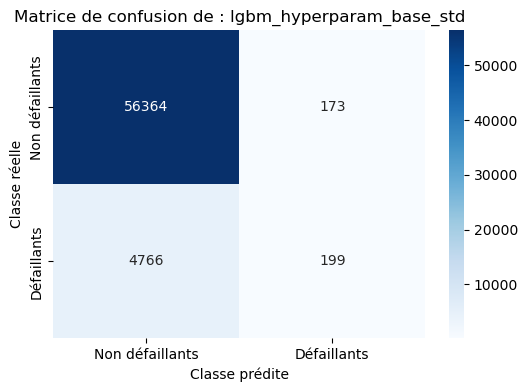

In [29]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base_std, X_train_std,
                                        X_valid_std, y_train, y_valid,
                                        df_resultats,
                                        'lgbm_hyperparam_base_std')

In [44]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base_std',
                            4766, 173, 199, 56364, df_taux)

**Avec rééquilibrage**

In [31]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base_std_bal = LGBMClassifier(random_state=seed, verbose=0,
                                   force_col_wise=True,
                                   class_weight='balanced')

Modèle    Recall  Précision        F1        F5  \
3  lgbm_hyperparam_base_std_bal  0.694663   0.186402  0.293932  0.628726   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
3  0.676402  0.784745  0.281211         30214       0.714989  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
3          0.78564             0.003996         0.767702              0.00165   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
3        0.693756            0.010574            0.204621   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
3                0.000529           0.185119               0.002367  

[1 rows x 24 columns]

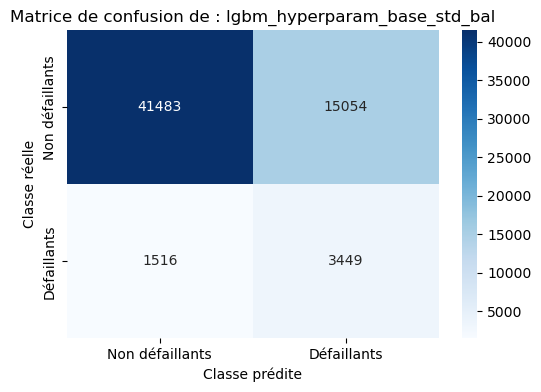

In [32]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base_std_bal, X_train_std,
                                        X_valid_std, y_train, y_valid,
                                        df_resultats,
                                        'lgbm_hyperparam_base_std_bal')

In [45]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base_std_bal',
                                        1516, 15054, 3449, 41483, df_taux)

<span style='background:Moccasin'>**Standardisation - MinMaxScaler**</span>

In [36]:
# MinMaxScaler
scaler_min = MinMaxScaler()

# Jeu de la target de consommation d'énergie non transformée en log10
X_train_min = scaler_min.fit_transform(X_train.copy(deep=True))
X_valid_min = scaler_min.transform(X_valid.copy(deep=True))

# Sauvegarde de la standardisation
with open(path + 'sauvegarde/modelisation/scaler_min.pickle', 'wb') as f:
    pickle.dump(scaler_min, f, pickle.HIGHEST_PROTOCOL)

In [37]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base_min = LGBMClassifier(random_state=seed, verbose=0,
                               force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
4  lgbm_hyperparam_base_minmax  0.044109   0.582447  0.082007  0.045735   

        F10  ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
4  0.044516  0.78183  0.275042         47617       0.539981  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
4         0.783862             0.004382         0.058745             0.001472   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
4         0.04003            0.002859            0.765575   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
4                0.010206           0.575279               0.038632  

[1 rows x 24 columns]

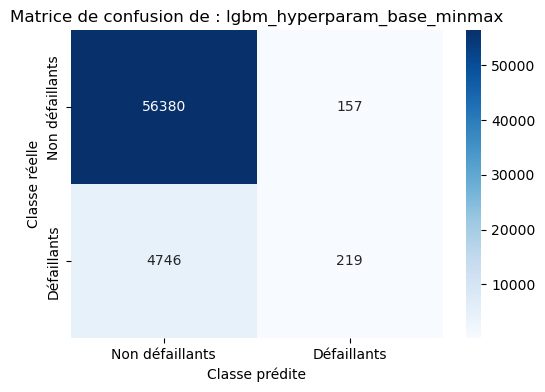

In [38]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base_min, X_train_min,
                                        X_valid_min, y_train, y_valid,
                                        df_resultats,
                                        'lgbm_hyperparam_base_minmax')

In [46]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base_minmax',
                                        4746, 157, 219, 56380, df_taux)

In [47]:
df_taux

Modèle    FN     FP    TP     TN
0          lgbm_hyperparam_base  4755    153   210  56384
1      lgbm_hyperparam_base_bal  1570  15032  3395  41505
2      lgbm_hyperparam_base_std  4766    173   199  56364
3  lgbm_hyperparam_base_std_bal  1516  15054  3449  41483
4   lgbm_hyperparam_base_minmax  4746    157   219  56380

<span style='background:Moccasin'>**Standardisation - RobustScaler**</span>

In [49]:
# RobustScaler
scaler_rob = RobustScaler()

X_train_rob = scaler_rob.fit_transform(X_train.copy(deep=True))
X_valid_rob = scaler_rob.transform(X_valid.copy(deep=True))

# Sauvegarde de la standardisation
with open(path + 'sauvegarde/modelisation/scaler_rob.pickle', 'wb') as f:
    pickle.dump(scaler_rob, f, pickle.HIGHEST_PROTOCOL)

In [50]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_base_rob = LGBMClassifier(random_state=seed, verbose=0,
                               force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
5  lgbm_hyperparam_base_robust  0.043303   0.593923  0.080721  0.044904   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
5  0.043704  0.782081  0.278269         47647       0.539687  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
5         0.783716             0.004143         0.059326              0.00246   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
5        0.039275            0.003355            0.760979   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
5                0.007859           0.550189               0.033918  

[1 rows x 24 columns]

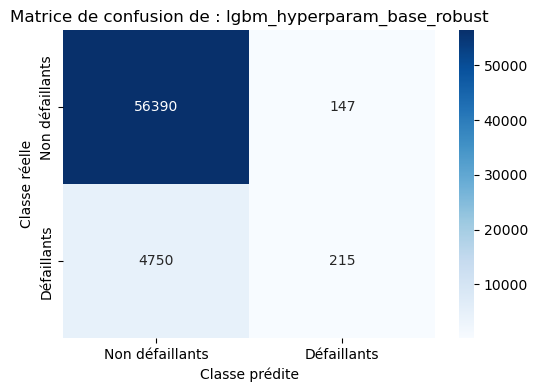

In [51]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_base_rob, X_train_rob,
                                        X_valid_rob, y_train, y_valid,
                                        df_resultats,
                                        'lgbm_hyperparam_base_robust')

In [52]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_hyperparam_base_robust',
                                        4750, 147, 215, 56390, df_taux)

In [53]:
df_taux

Modèle    FN     FP    TP     TN
0          lgbm_hyperparam_base  4755    153   210  56384
1      lgbm_hyperparam_base_bal  1570  15032  3395  41505
2      lgbm_hyperparam_base_std  4766    173   199  56364
3  lgbm_hyperparam_base_std_bal  1516  15054  3449  41483
4   lgbm_hyperparam_base_minmax  4746    157   219  56380
5   lgbm_hyperparam_base_robust  4750    147   215  56390

**Bilan** :
Le nombre de faux négatifs sont globalement les mêmes pour le jeux d'entraînement non standardisé. Ce résultat nous conforte sur la connaissance théorique, à savoir que les algorithmes non basés sur des calculs de distances peuvent manipuler les données non standardisées.  

### <span style='background:PowderBlue'>Optimisation : OPTUNA intégré à LGBM</span>

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score ROC_AUC</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [16]:
# Modèle et hyperparamètres à étudier
def create_model(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 10000)
    max_depth = trial.suggest_int('max_depth', 3, 11)
#     learning_rate = trial.suggest_uniform('learning_rate', 0.0001, 0.99)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    lambda_l1 = trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
    lambda_l2 = trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    feature_fraction = trial.suggest_uniform('feature_fraction', 0.4, 1.0),
    bagging_fraction = trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
    bagging_freq = trial.suggest_int('bagging_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'auc',
        class_weight='balanced',
#         n_estimators=n_estimators, 
        max_depth=max_depth, 
#         learning_rate=learning_rate,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        lambda_l1=lambda_l1,
        lambda_l2=lambda_l2,
        num_leaves=num_leaves,
        feature_fraction=feature_fraction,
        bagging_fraction=bagging_fraction,
        bagging_freq=bagging_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [17]:
# Objective fonction
def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, y_proba)
    return score

In [18]:
# Recherche des p
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-04-25 14:06:46,233] A new study created in memory with name: no-name-48b07012-787f-4272-9f20-49ca407dd94c
[I 2024-04-25 14:07:03,051] Trial 0 finished with value: 0.7624873842742449 and parameters: {'max_depth': 9, 'subsample': 0.692565070124931, 'colsample_bytree': 0.30624822838110877, 'lambda_l1': 0.001645319454348554, 'lambda_l2': 1.3617212127322036e-08, 'num_leaves': 166, 'feature_fraction': 0.8725116223511493, 'bagging_fraction': 0.41442618630329414, 'bagging_freq': 7, 'min_child_samples': 8}. Best is trial 0 with value: 0.7624873842742449.
[I 2024-04-25 14:07:18,184] Trial 1 finished with value: 0.7759873530405215 and parameters: {'max_depth': 9, 'subsample': 0.6422891250571869, 'colsample_bytree': 0.9099283006085903, 'lambda_l1': 0.29641098049002645, 'lambda_l2': 0.000576615415722855, 'num_leaves': 175, 'feature_fraction': 0.4962596389580006, 'bagging_fraction': 0.7549026796872055, 'bagging_freq': 3, 'min_child_samples': 54}. Best is trial 1 with value: 0.775987353040521

In [19]:
params = study.best_params
print(f'Nombre d\'essai terminés : {len(study.trials)}')
print('Meilleurs hyperparamètres:\n')
print(params)

Nombre d'essai terminés : 100
Meilleurs hyperparamètres:

{'max_depth': 9, 'subsample': 0.624983779031465, 'colsample_bytree': 0.6569897031234919, 'lambda_l1': 0.012062470353537793, 'lambda_l2': 5.402136769286383, 'num_leaves': 54, 'feature_fraction': 0.869408615959647, 'bagging_fraction': 0.9309614319443711, 'bagging_freq': 3, 'min_child_samples': 65}


In [20]:
param_lgbm_optuna_opt_1 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,
                           'class_weight' : 'balanced', # Balanced                                 
                           'max_depth': 9,
                           'subsample': 0.624983779031465,               
                           'colsample_bytree': 0.6569897031234919,                          
                           'reg_alpha': 0.012062470353537793,
                           'reg_lambda': 5.402136769286383,
                           'num_leaves': 54,
                           'min_child_weight': 0.869408615959647,
                           'subsample': 0.9309614319443711,
                           'subsample_freq': 3,
                           'min_child_samples': 65,
                           'verbosity' : -1}

In [21]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_1 = LGBMClassifier(**param_lgbm_optuna_opt_1,
                                      force_col_wise=True)

Modèle   Recall  Précision        F1       F5       F10  \
9  lgbm_optuna_opt_1  0.67432   0.190693  0.297309  0.61439  0.657803   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
9  0.783479  0.280623         30379       0.713006  ...         0.785138   

   Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
9             0.004004         0.794025              0.00112        0.676485   

   Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
9            0.008681             0.22394                0.000623   

   Test_precision_CV  Test_precision_CV +/-  
9           0.191437               0.002173  

[1 rows x 24 columns]

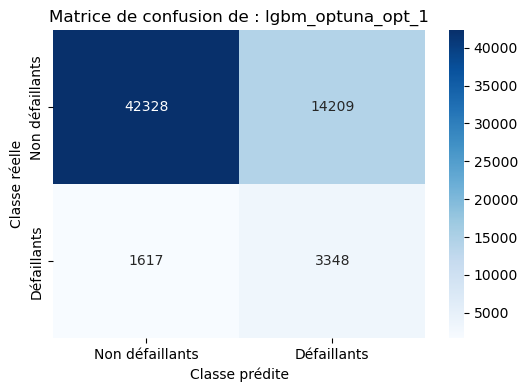

In [22]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_1,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_1')

In [23]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_1',
                                        1617, 14209, 3348, 42328, df_taux)

**Avec les hyperparamètres n_estimators et learning_rate**

In [24]:
# Modèle et hyperparamètres à étudier
def create_model_2(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 1000)
    max_depth = trial.suggest_int('max_depth', 3, 11)
    learning_rate = trial.suggest_uniform('learning_rate', 0.0001, 0.99)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'auc',
        class_weight='balanced',
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [25]:
# Objective fonction
def objective_2(trial):
    model = create_model_2(trial)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_valid)[:,1]
    score = roc_auc_score(y_valid, y_proba)
    return score

In [26]:
# Recherche des p
study_2 = optuna.create_study(direction='maximize')
study_2.optimize(objective_2, n_trials=100)

[I 2024-04-25 14:33:05,395] A new study created in memory with name: no-name-edfcd4fe-fad5-4409-8cb1-d1adbc627118
[I 2024-04-25 14:33:41,447] Trial 0 finished with value: 0.6282573037528685 and parameters: {'n_estimators': 797, 'max_depth': 7, 'learning_rate': 0.8048842259221278, 'subsample': 0.5120580007615686, 'colsample_bytree': 0.3412815574008633, 'reg_alpha': 0.18168835132370076, 'reg_lambda': 0.0003419736435939097, 'num_leaves': 97, 'min_child_weight': 0.7492238118831349, 'subsample_freq': 1, 'min_child_samples': 39}. Best is trial 0 with value: 0.6282573037528685.
[I 2024-04-25 14:33:50,846] Trial 1 finished with value: 0.7601159724987199 and parameters: {'n_estimators': 202, 'max_depth': 5, 'learning_rate': 0.40066341948580536, 'subsample': 0.8557832671963866, 'colsample_bytree': 0.5911895345704845, 'reg_alpha': 0.0015286096961095205, 'reg_lambda': 0.003907623502239026, 'num_leaves': 202, 'min_child_weight': 0.7164088113316129, 'subsample_freq': 7, 'min_child_samples': 99}. Bes

In [28]:
params_2 = study_2.best_params
print(f'Nombre d\'essai terminés : {len(study_2.trials)}')
print('Best hyperparamètres:\n')
print(params_2)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'n_estimators': 793, 'max_depth': 5, 'learning_rate': 0.03954926061269912, 'subsample': 0.7165440137553711, 'colsample_bytree': 0.6449831256948678, 'reg_alpha': 0.3052001860241458, 'reg_lambda': 2.7399978531290956, 'num_leaves': 256, 'min_child_weight': 0.6712756968387966, 'subsample_freq': 1, 'min_child_samples': 67}


In [29]:
param_lgbm_optuna_opt_2 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,
                           'class_weight' : 'balanced', # Balanced        
                           'colsample_bytree': 0.6449831256948678,
                           'max_depth': 5,
                           'min_child_weight': 0.6712756968387966,
                           'num_leaves': 256,
                           'reg_alpha': 0.3052001860241458,
                           'reg_lambda': 2.7399978531290956,
                           'subsample': 0.7165440137553711,
                           'subsample_freq': 1,
                           'min_child_samples': 67,
                           'n_estimators': 793,
                           'learning_rate': 0.03954926061269912,
                           'verbosity' : -1}

In [30]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_2 = LGBMClassifier(**param_lgbm_optuna_opt_2,
                                   force_col_wise=True)

Modèle    Recall  Précision        F1        F5       F10  \
10  lgbm_optuna_opt_2  0.663646   0.201369  0.308983  0.609803  0.648896   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
10  0.787333  0.285163         29768       0.734592  ...         0.789872   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
10             0.004198         0.808252             0.000858        0.663847   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
10            0.010023            0.243738                 0.00045   

    Test_precision_CV  Test_precision_CV +/-  
10            0.20075               0.002345  

[1 rows x 24 columns]

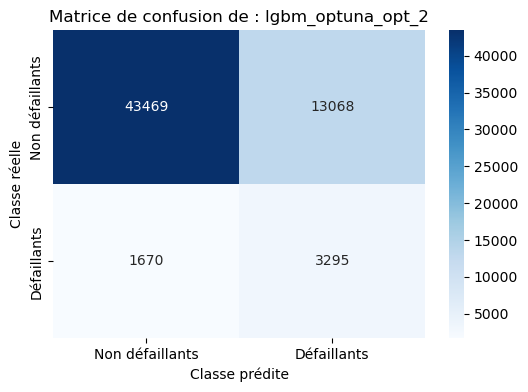

In [31]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_2,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_2')

In [32]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_2',
                                        1670, 13068, 3295, 43469, df_taux)

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score Métrique métier</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [33]:
# Modèle et hyperparamètres à étudier
def create_model_3(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'custom_score',
        class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [34]:
# Objective fonction
def objective_3(trial):
    model = create_model_3(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = custom_score2(y_valid, y_pred)
    return score

In [35]:
# Recherche des paramètres
study_3 = optuna.create_study(direction='maximize')
study_3.optimize(objective_3, n_trials=100)

[I 2024-04-25 15:42:19,234] A new study created in memory with name: no-name-af4ec727-20a3-4d51-aaed-459e2574e544
[I 2024-04-25 15:42:27,476] Trial 0 finished with value: 0.7162067875650758 and parameters: {'max_depth': 5, 'subsample': 0.9610596984383665, 'colsample_bytree': 0.4842628356176579, 'reg_alpha': 2.5593014401106813e-05, 'reg_lambda': 0.05624973109457, 'num_leaves': 66, 'min_child_weight': 0.5933524643039467, 'subsample_freq': 3, 'min_child_samples': 74}. Best is trial 0 with value: 0.7162067875650758.
[I 2024-04-25 15:42:35,071] Trial 1 finished with value: 0.7152287866228554 and parameters: {'max_depth': 11, 'subsample': 0.6526054570246542, 'colsample_bytree': 0.8144291779023104, 'reg_alpha': 0.0005166644429270309, 'reg_lambda': 8.353310110414877e-06, 'num_leaves': 20, 'min_child_weight': 0.9922699477968853, 'subsample_freq': 7, 'min_child_samples': 74}. Best is trial 0 with value: 0.7162067875650758.
[I 2024-04-25 15:42:41,718] Trial 2 finished with value: 0.71441179803087

In [36]:
params_3 = study_3.best_params
print(f'Nombre d\'essai terminés : {len(study_3.trials)}')
print('Best hyperparamètres:\n')
print(params_3)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.9706785111861606, 'colsample_bytree': 0.7688221791531633, 'reg_alpha': 1.6982132831205553e-06, 'reg_lambda': 4.460136916201637e-08, 'num_leaves': 227, 'min_child_weight': 0.9324376020065317, 'subsample_freq': 2, 'min_child_samples': 95}


In [37]:
param_lgbm_optuna_opt_3 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,
                           'class_weight' : 'balanced', # Balanced        
                           'colsample_bytree': 0.7688221791531633,
                           'max_depth': 11,
                           'min_child_weight': 0.9324376020065317,
                           'num_leaves': 227,
                           'reg_alpha': 1.6982132831205553e-06,
                           'reg_lambda': 4.460136916201637e-08,
                           'subsample': 0.9706785111861606,
                           'subsample_freq': 2,
                           'min_child_samples': 95,
                           'verbosity' : -1}

In [38]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_3 = LGBMClassifier(**param_lgbm_optuna_opt_3,
                                      force_col_wise=True)

Modèle    Recall  Précision       F1        F5       F10  \
11  lgbm_optuna_opt_3  0.561732   0.220841  0.31704  0.530251  0.553276   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
11  0.776878  0.273542         31600       0.739899  ...         0.778193   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
11             0.004463         0.948159             0.001729        0.557503   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
11            0.007777            0.369983                 0.00207   

    Test_precision_CV  Test_precision_CV +/-  
11            0.22419               0.004007  

[1 rows x 24 columns]

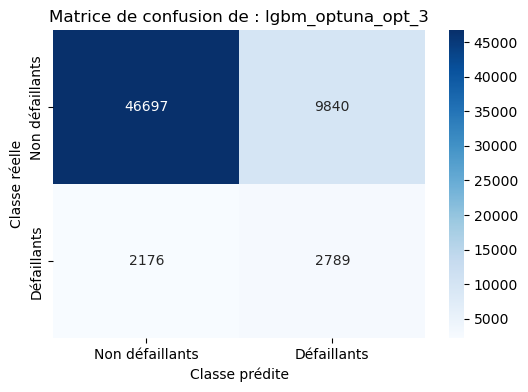

In [39]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_3,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_3')

In [40]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_3',
                                        2176, 9840, 2789, 46697, df_taux)

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score PR_AUC</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [41]:
# Modèle et hyperparamètres à étudier
def create_model_4(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'pr_auc',
        class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [42]:
# Objective fonction
def objective_4(trial):
    model = create_model_3(trial)
    model.fit(X_train, y_train)
    y_proba = model.predict_proba(X_valid)[:,1]
    score = average_precision_score(y_valid, y_proba)
    return score

In [43]:
# Recherche des paramètres
study_4 = optuna.create_study(direction='maximize')
study_4.optimize(objective_4, n_trials=100)

[I 2024-04-25 17:02:11,204] A new study created in memory with name: no-name-2154581d-5d89-49d7-9097-783311a367b8
[I 2024-04-25 17:02:19,400] Trial 0 finished with value: 0.26998519323276093 and parameters: {'max_depth': 6, 'subsample': 0.6727880788834105, 'colsample_bytree': 0.7708345887893511, 'reg_alpha': 0.19969763679876948, 'reg_lambda': 2.855739856666724e-05, 'num_leaves': 64, 'min_child_weight': 0.6680836404091806, 'subsample_freq': 5, 'min_child_samples': 72}. Best is trial 0 with value: 0.26998519323276093.
[I 2024-04-25 17:02:28,133] Trial 1 finished with value: 0.24619915507612125 and parameters: {'max_depth': 7, 'subsample': 0.14361258003820151, 'colsample_bytree': 0.47422973869767815, 'reg_alpha': 0.0073024262820215085, 'reg_lambda': 0.00506482918650984, 'num_leaves': 181, 'min_child_weight': 0.6296900319939011, 'subsample_freq': 6, 'min_child_samples': 45}. Best is trial 0 with value: 0.26998519323276093.
[I 2024-04-25 17:02:36,004] Trial 2 finished with value: 0.26860234

In [44]:
params_4 = study_4.best_params
print(f'Nombre d\'essai terminés : {len(study_4.trials)}')
print('Best hyperparamètres:\n')
print(params_4)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 7, 'subsample': 0.9786516462491814, 'colsample_bytree': 0.9738232939731416, 'reg_alpha': 1.6785906470102714, 'reg_lambda': 2.601472687186495, 'num_leaves': 55, 'min_child_weight': 0.8164727845264294, 'subsample_freq': 1, 'min_child_samples': 9}


In [45]:
param_lgbm_optuna_opt_4 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,
                           'class_weight' : 'balanced', # Balanced        
                           'colsample_bytree': 0.9738232939731416,
                           'max_depth': 7,
                           'min_child_weight': 0.8164727845264294,
                           'num_leaves': 55,
                           'reg_alpha': 1.6785906470102714,
                           'reg_lambda': 2.601472687186495,
                           'subsample': 0.9786516462491814,
                           'subsample_freq': 1,
                           'min_child_samples': 9,
                           'verbosity' : -1}

In [46]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_4 = LGBMClassifier(**param_lgbm_optuna_opt_4,
                                      force_col_wise=True)

Modèle   Recall  Précision        F1        F5      F10  \
12  lgbm_optuna_opt_4  0.67291   0.191428  0.298064  0.613556  0.65656   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
12  0.783252  0.279563         30352       0.725158  ...         0.783964   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
12             0.004057         0.791765             0.001322        0.671702   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
12            0.010417            0.225238                0.000546   

    Test_precision_CV  Test_precision_CV +/-  
12           0.191956               0.002431  

[1 rows x 24 columns]

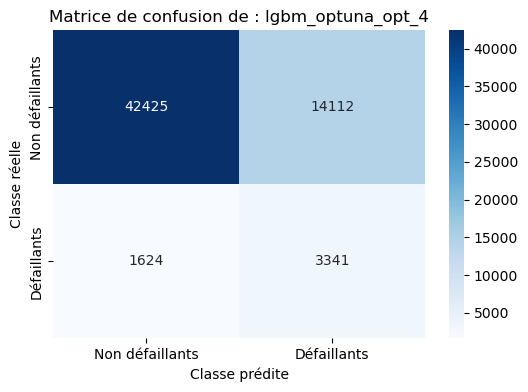

In [47]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_4,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_4')

In [48]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_4',
                                        1624, 14112, 3341, 42425, df_taux)

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score F10</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [51]:
# Modèle et hyperparamètres à étudier
def create_model_5(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'f10_score',
        class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

# Objective fonction
def objective_5(trial):
    model = create_model_3(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = fbeta_score(y_valid, y_pred, beta=10)
    return score

In [52]:
# Recherche des paramètres
study_5 = optuna.create_study(direction='maximize')
study_5.optimize(objective_5, n_trials=100)

[I 2024-04-25 17:40:23,614] A new study created in memory with name: no-name-e2812d96-d386-497a-ba01-f7c7ede63553
[I 2024-04-25 17:40:32,744] Trial 0 finished with value: 0.6146931800891844 and parameters: {'max_depth': 8, 'subsample': 0.3317153974602947, 'colsample_bytree': 0.8291227608027506, 'reg_alpha': 0.04350493909328166, 'reg_lambda': 1.2981742512847479e-08, 'num_leaves': 128, 'min_child_weight': 0.4495888679324785, 'subsample_freq': 4, 'min_child_samples': 92}. Best is trial 0 with value: 0.6146931800891844.
[I 2024-04-25 17:40:39,426] Trial 1 finished with value: 0.6243745059327017 and parameters: {'max_depth': 8, 'subsample': 0.14514574533030417, 'colsample_bytree': 0.6445208888346908, 'reg_alpha': 0.001843563479967375, 'reg_lambda': 2.6138428599726695e-06, 'num_leaves': 61, 'min_child_weight': 0.7857451807015974, 'subsample_freq': 2, 'min_child_samples': 98}. Best is trial 1 with value: 0.6243745059327017.
[I 2024-04-25 17:40:47,143] Trial 2 finished with value: 0.6384644614

In [53]:
params_5 = study_5.best_params
print(f'Nombre d\'essai terminés : {len(study_5.trials)}')
print('Best hyperparamètres:\n')
print(params_5)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 6, 'subsample': 0.46934312994673416, 'colsample_bytree': 0.7427956029183773, 'reg_alpha': 1.6642468933723128e-08, 'reg_lambda': 2.482025142315579e-06, 'num_leaves': 6, 'min_child_weight': 0.8617347450806055, 'subsample_freq': 1, 'min_child_samples': 72}


In [54]:
param_lgbm_optuna_opt_5 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,
                           'class_weight' : 'balanced', # Balanced        
                           'colsample_bytree': 0.7427956029183773,
                           'max_depth': 6,
                           'min_child_samples': 72,
                           'min_child_weight': 0.8617347450806055,
                           'num_leaves': 6,
                           'reg_alpha': 1.6642468933723128e-08,
                           'reg_lambda': 2.482025142315579e-06,
                           'subsample': 0.46934312994673416,
                           'subsample_freq': 1,
                           'verbosity' : -1}

In [55]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_5 = LGBMClassifier(**param_lgbm_optuna_opt_5,
                                      force_col_wise=True)

Modèle    Recall  Précision        F1        F5       F10  \
13  lgbm_optuna_opt_5  0.701712   0.172843  0.277366  0.627826  0.681079   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
13  0.774461  0.265106         31483       0.703994  ...         0.776083   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
13             0.005094         0.720365             0.001498        0.709567   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
13            0.010643            0.176237                0.000487   

    Test_precision_CV  Test_precision_CV +/-  
13           0.173451               0.002472  

[1 rows x 24 columns]

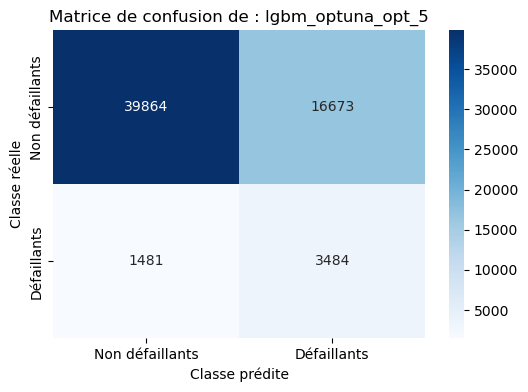

In [56]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_5,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_5')

In [57]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_5',
                                        1481, 16673, 3484, 39864, df_taux)

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score F1</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [58]:
# Modèle et hyperparamètres à étudier
def create_model_F1(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'f1_score',
        class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [61]:
# Objective fonction
def objective_F1(trial):
    model = create_model_F1(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = fbeta_score(y_valid, y_pred, beta=1)
    return score

In [62]:
# Recherche des paramètres
study_F1 = optuna.create_study(direction='maximize')
study_F1.optimize(objective_F1, n_trials=100)

[I 2024-04-25 17:56:58,790] A new study created in memory with name: no-name-7a0f8e77-7a6e-4464-872f-52f88cc87944
[I 2024-04-25 17:57:05,886] Trial 0 finished with value: 0.29915920802820717 and parameters: {'max_depth': 7, 'subsample': 0.8547287776112797, 'colsample_bytree': 0.1939524981899331, 'reg_alpha': 0.007816596140183065, 'reg_lambda': 3.5823130535057706, 'num_leaves': 66, 'min_child_weight': 0.5493051639913363, 'subsample_freq': 5, 'min_child_samples': 66}. Best is trial 0 with value: 0.29915920802820717.
[I 2024-04-25 17:57:17,405] Trial 1 finished with value: 0.2935245816443197 and parameters: {'max_depth': 10, 'subsample': 0.14389858066049951, 'colsample_bytree': 0.4452404229782779, 'reg_alpha': 5.000809588555765, 'reg_lambda': 1.07802023064488e-05, 'num_leaves': 167, 'min_child_weight': 0.49065494082363126, 'subsample_freq': 3, 'min_child_samples': 32}. Best is trial 0 with value: 0.29915920802820717.
[I 2024-04-25 17:57:24,472] Trial 2 finished with value: 0.2731172545281

In [63]:
params_F1 = study_F1.best_params
print(f'Nombre d\'essai terminés : {len(study_F1.trials)}')
print('Best hyperparamètres:\n')
print(params_F1)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.9131177737239587, 'colsample_bytree': 0.9993479507904341, 'reg_alpha': 5.936719302304986e-07, 'reg_lambda': 4.5412039698477416e-08, 'num_leaves': 239, 'min_child_weight': 0.8085806972945448, 'subsample_freq': 5, 'min_child_samples': 68}


In [64]:
param_lgbm_optuna_opt_F1 = {'objective' : 'binary',
                            'boosting_type' : 'gbdt',
                            'n_jobs' : -1,
                            'class_weight' : 'balanced', # Balanced        
                            'colsample_bytree': 0.9993479507904341,
                            'max_depth': 11,
                            'min_child_samples': 68,
                            'min_child_weight': 0.8085806972945448,
                            'num_leaves': 239,
                            'reg_alpha': 5.936719302304986e-07,
                            'reg_lambda': 4.5412039698477416e-08,
                            'subsample': 0.9131177737239587,
                            'subsample_freq': 5,
                            'verbosity' : -1}

In [65]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_F1 = LGBMClassifier(**param_lgbm_optuna_opt_F1,
                                    force_col_wise=True)

Modèle    Recall  Précision        F1        F5       F10  \
14  lgbm_optuna_opt_F1  0.551057   0.224981  0.319514  0.521961  0.543262   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
14  0.776557  0.269244         31715       0.741372  ...         0.775293   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
14             0.003592         0.953306             0.002172        0.537714   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
14            0.011512            0.387714                0.003268   

    Test_precision_CV  Test_precision_CV +/-  
14           0.226045               0.004227  

[1 rows x 24 columns]

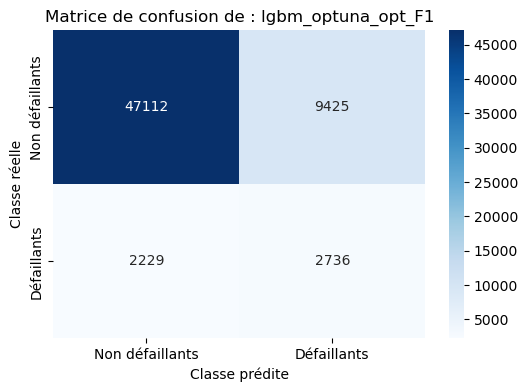

In [66]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_F1,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_F1')

In [67]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_F1',
                                        2229, 9425, 2736, 47112, df_taux)

#### <span style='background:Moccasin'>Optimisation LGBM : Optuna intégrée à LightGBM - Score F5</span>

**Sans les hyperparamètres n_estimators et learning_rate**

In [68]:
# Modèle et hyperparamètres à étudier
def create_model_F5(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'f5_score',
        class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [69]:
# Objective fonction
def objective_F5(trial):
    model = create_model_F5(trial)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    score = fbeta_score(y_valid, y_pred, beta=5)
    return score

In [70]:
# Recherche des paramètres
study_F5 = optuna.create_study(direction='maximize')
study_F5.optimize(objective_F5, n_trials=100)

[I 2024-04-25 18:38:37,087] A new study created in memory with name: no-name-d4b63289-c240-4a0e-8223-280f907d7f7e
[I 2024-04-25 18:38:44,959] Trial 0 finished with value: 0.548135625058702 and parameters: {'max_depth': 9, 'subsample': 0.6443229850493615, 'colsample_bytree': 0.10677763458901088, 'reg_alpha': 0.06994738441429474, 'reg_lambda': 2.8757080032537225e-08, 'num_leaves': 194, 'min_child_weight': 0.9996124907806445, 'subsample_freq': 2, 'min_child_samples': 6}. Best is trial 0 with value: 0.548135625058702.
[I 2024-04-25 18:38:54,174] Trial 1 finished with value: 0.6100718611907215 and parameters: {'max_depth': 6, 'subsample': 0.8970923006224565, 'colsample_bytree': 0.2944762694524132, 'reg_alpha': 5.825589234971288e-07, 'reg_lambda': 3.5284816500375468e-06, 'num_leaves': 93, 'min_child_weight': 0.4969005988789854, 'subsample_freq': 1, 'min_child_samples': 67}. Best is trial 1 with value: 0.6100718611907215.
[I 2024-04-25 18:38:59,568] Trial 2 finished with value: 0.628444567781

In [71]:
params_F5 = study_F5.best_params
print(f'Nombre d\'essai terminés : {len(study_F5.trials)}')
print('Best hyperparamètres:\n')
print(params_F5)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 7, 'subsample': 0.844360439519852, 'colsample_bytree': 0.9127593638221508, 'reg_alpha': 1.6259321954674377, 'reg_lambda': 6.234119046903866e-08, 'num_leaves': 22, 'min_child_weight': 0.8247806534465904, 'subsample_freq': 6, 'min_child_samples': 84}


In [72]:
param_lgbm_optuna_opt_F5 = {'objective' : 'binary',
                            'boosting_type' : 'gbdt',
                            'n_jobs' : -1,
                            'class_weight' : 'balanced', # Balanced        
                            'colsample_bytree': 0.9127593638221508,
                            'max_depth': 7,
                            'min_child_samples': 84,
                            'min_child_weight': 0.8247806534465904,
                            'num_leaves': 22,
                            'reg_alpha': 1.6259321954674377,
                            'reg_lambda': 6.234119046903866e-08,
                            'subsample': 0.844360439519852,
                            'subsample_freq': 6,
                            'verbosity' : -1}

In [73]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_opt_F5 = LGBMClassifier(**param_lgbm_optuna_opt_F5,
                                    force_col_wise=True)

Modèle    Recall  Précision        F1        F5       F10  \
15  lgbm_optuna_opt_F5  0.694663    0.18267  0.289273  0.627065  0.675906   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
15  0.782373  0.277606         30592       0.716499  ...         0.784778   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
15             0.004479         0.748926             0.000995        0.702417   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
15            0.010557            0.195902                0.000614   

    Test_precision_CV  Test_precision_CV +/-  
15           0.183906               0.002747  

[1 rows x 24 columns]

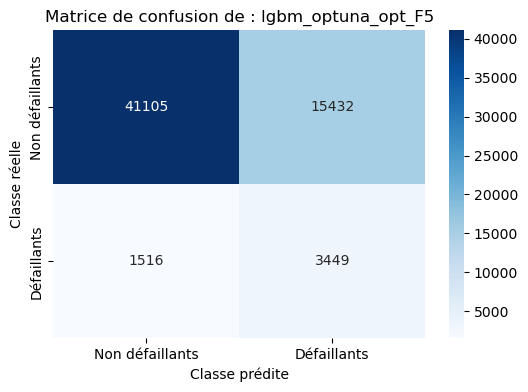

In [74]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_opt_F5,
                                        X_train, X_valid,
                                        y_train, y_valid, df_resultats,
                                        'lgbm_optuna_opt_F5')

In [75]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_opt_F5',
                                        1516, 15432, 3449, 41105, df_taux)

### <span style='background:PowderBlue'>Optimisation : rééquilibrage des classes</span>

**Répartition variable cible?**

In [14]:
from collections import Counter

# Jeu d'entraînement du jeu d'entraînement
# Répartition des la cible 0 (non-défaillants) - 1 (défaillants)?
y_train_distrib = Counter(y_train)
print('Répartition des classes : ')
print(y_train_distrib)
# Pourcentage
y_train_distrib_norm = y_train.value_counts(normalize=True)*100
print('\nRépartition des classes (en %) :')
print(y_train_distrib_norm)

Répartition des classes : 
Counter({0: 226145, 1: 19860})

Répartition des classes (en %) :
TARGET
0    91.926993
1     8.073007
Name: proportion, dtype: float64


In [15]:
# Jeu de validation du jeu d'entraînement
# Répartition des la cible 0 (non-défaillants) - 1 (défaillants)?
y_valid_distrib = Counter(y_valid)
print('Répartition des classes : ')
print(y_valid_distrib)
# Pourcentage
y_valid_distrib_norm = y_valid.value_counts(normalize=True)*100
print('\nRépartition des classes (en %) :')
print(y_valid_distrib_norm)

Répartition des classes : 
Counter({0: 56537, 1: 4965})

Répartition des classes (en %) :
TARGET
0    91.927092
1     8.072908
Name: proportion, dtype: float64


**Bilan** :
- La variable cible est fortement déséquilibrée 90% de non défaillants et 10% de défaillants ==> on tentera un rééquilibrage de la variable cible pour optimiser le modèle.

Plusieurs méthodes de réquilibrage sont à notre disposition :
- undersampling : consiste en un sous-échantillonnage de la classe majoritaire.
- oversampling : sur-échantillonnage de la classe minoritaire (ex : SMOTE, ADASYN).
- une combinaison d'oversampling suivi d'undersampling (possible avec SMOTE).
- hyperparamètre du modèle Ligthgbm : class_weight='balanced'.

#### <span style='background:Moccasin'>Rééquilibrage - oversampling : SMOTE</span>

**SMOTE - paramètres par défaut**

In [84]:
# Répartition des classes au départ
counter_original = Counter(y_train)
print(counter_original)
# Application de l'oversampling via SMOTE avec les paramètres par défaut
oversample = SMOTE()
X_train_smote, y_train_smote = \
    oversample.fit_resample(X_train, y_train)
X_valid_smote, y_valid_smote = \
    oversample.fit_resample(X_valid, y_valid)
# Répartition après oversampling SMOTE paramètres par défaut
counter_smote_def = Counter(y_train_smote)
print(counter_smote_def)

Counter({0: 226145, 1: 19860})
Counter({0: 226145, 1: 226145})


#### <span style='background:LightGreen'>**Modèle LightGBM - hyperparamètres de base**</span>

In [17]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_smote_base = LGBMClassifier(random_state=seed, verbose=0,
                                 force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
6  lgbm_smote_hyperparam_base  0.913225   0.996757  0.953164  0.916178   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
6  0.913983  0.979668  0.985325         49228       0.920512  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
6         0.970262             0.088977         0.914587             0.028034   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
6        0.910489            0.262947            0.996901   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
6                0.001036           0.996879                0.00111  

[1 rows x 24 columns]

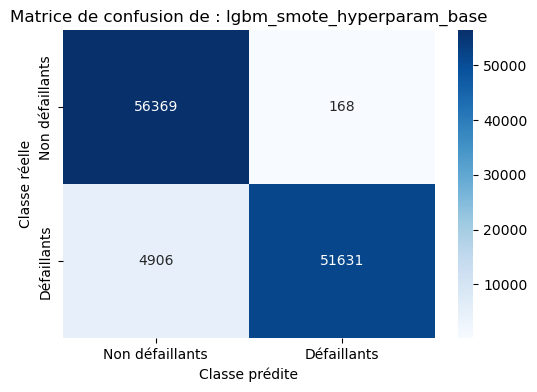

In [23]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base,
                                        X_train_smote, X_valid_smote,
                                        y_train_smote, y_valid_smote,
                                        df_resultats,
                                        'lgbm_smote_hyperparam_base')

In [26]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_hyperparam_base',
                                        4906, 168, 51631, 56369, df_taux)

Modèle    Recall  Précision        F1       F5  \
7  lgbm_smote_hyperparam_base_train  0.042296   0.578512  0.078829  0.04386   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
7  0.042688  0.781519  0.276539         47703       0.539149  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
7         0.784181             0.004946         0.059483             0.002252   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
7        0.040836            0.004557            0.763636   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
7                0.006599           0.565895               0.043276  

[1 rows x 24 columns]

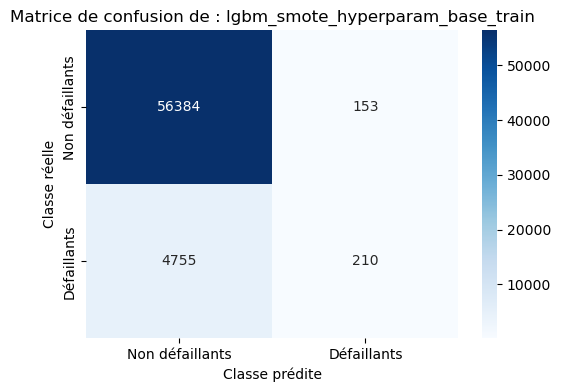

In [27]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_smote_hyperparam_base_train')

In [28]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_hyperparam_base_train',
                                        4755, 153, 210, 56384, df_taux)

#### <span style='background:LightGreen'>**Modèle LightGBM - hyperparamètres de base + class_weight='balanced'**</span>

In [77]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_smote_base_bal = LGBMClassifier(class_weight='balanced',
                                     random_state=seed, verbose=0,
                                     force_col_wise=True)

Modèle    Recall  Précision        F1        F5       F10  \
8  lgbm_smote_base_bal  0.913225   0.996757  0.953164  0.916178  0.913983   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
8  0.979668  0.985325         49228       0.920512  ...         0.970262   

   Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
8             0.088977         0.914587             0.028034        0.910489   

   Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
8            0.262947            0.996901                0.001036   

   Test_precision_CV  Test_precision_CV +/-  
8           0.996879                0.00111  

[1 rows x 24 columns]

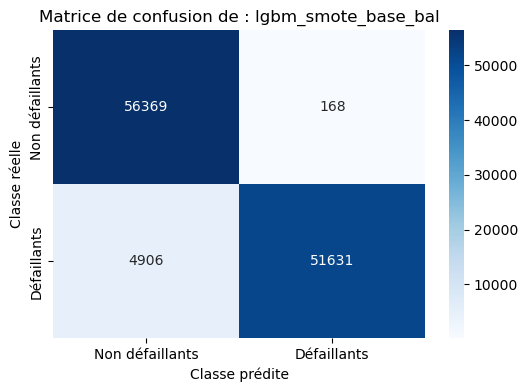

In [30]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_bal,
                                        X_train_smote, X_valid_smote,
                                        y_train_smote, y_valid_smote,
                                        df_resultats,
                                        'lgbm_smote_base_bal')

In [31]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_base_bal',
                                        4906, 168, 51631, 56369, df_taux)

Modèle    Recall  Précision       F1        F5  \
16  lgbm_smote_base_bal_train  0.683787   0.184241  0.29027  0.619213   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
16  0.66591  0.783201  0.280375         30732       0.717727  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
16          0.78547             0.003922         0.768356   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
16             0.001093        0.694058            0.008323   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
16            0.204906                0.000461           0.185671   

    Test_precision_CV +/-  
16               0.002194  

[1 rows x 24 columns]

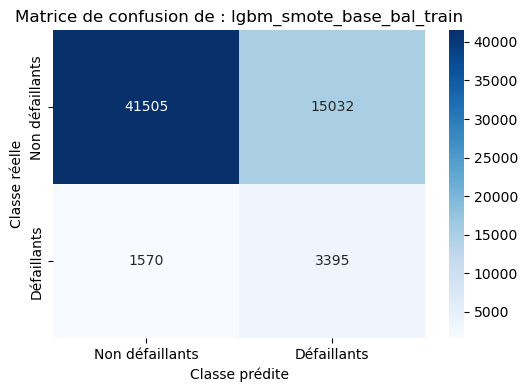

In [78]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_bal,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_smote_base_bal_train')

In [79]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_base_bal_train',
                                        1570, 15032, 3395, 41505, df_taux)

#### <span style='background:LightGreen'>**Optimisation des hyperparamètres - optuna - score ROC_AUC**</span>

In [80]:
# Modèle et hyperparamètres à étudier
def create_model_7(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'auc',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [81]:
# Objective fonction
def objective_7(trial):
    model = create_model_7(trial)
    model.fit(X_train_smote, y_train_smote)
    y_proba_smote = model.predict_proba(X_valid_smote)[:,1]
    score = roc_auc_score(y_valid_smote, y_proba_smote)
    return score

In [85]:
# Recherche des paramètres
study_7 = optuna.create_study(direction='maximize')
study_7.optimize(objective_7, n_trials=100)

[I 2024-04-25 19:06:51,962] A new study created in memory with name: no-name-b8124232-30b2-4d87-9b5e-df134808d13a
[I 2024-04-25 19:07:05,811] Trial 0 finished with value: 0.9787541067164058 and parameters: {'max_depth': 6, 'subsample': 0.4410811160325949, 'colsample_bytree': 0.7540796421331438, 'reg_alpha': 1.0902347859158762e-08, 'reg_lambda': 8.020622690450055e-07, 'num_leaves': 111, 'min_child_weight': 0.7382467756076893, 'subsample_freq': 6, 'min_child_samples': 17}. Best is trial 0 with value: 0.9787541067164058.
[I 2024-04-25 19:07:17,405] Trial 1 finished with value: 0.9788465510311568 and parameters: {'max_depth': 8, 'subsample': 0.9207308558840199, 'colsample_bytree': 0.14430119087367044, 'reg_alpha': 8.909991729231172e-05, 'reg_lambda': 8.665197405751818e-05, 'num_leaves': 38, 'min_child_weight': 0.7186955859007036, 'subsample_freq': 1, 'min_child_samples': 24}. Best is trial 1 with value: 0.9788465510311568.
[I 2024-04-25 19:07:28,766] Trial 2 finished with value: 0.97634915

In [86]:
params_7 = study_7.best_params
print(f'Nombre d\'essai terminés : {len(study_7.trials)}')
print('Best hyperparamètres:\n')
print(params_7)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.944057888551413, 'colsample_bytree': 0.9094016088541537, 'reg_alpha': 8.976911956285534e-07, 'reg_lambda': 9.777346055748934e-05, 'num_leaves': 146, 'min_child_weight': 0.6817153601554442, 'subsample_freq': 2, 'min_child_samples': 64}


In [87]:
param_lgbm_optuna_opt_7 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,    
                           'colsample_bytree': 0.9094016088541537,
                           'max_depth': 11,
                           'min_child_samples': 64,
                           'min_child_weight': 0.6817153601554442,
                           'num_leaves': 146,
                           'reg_alpha': 8.976911956285534e-07,
                           'reg_lambda': 9.777346055748934e-05,
                           'subsample': 0.944057888551413,
                           'subsample_freq': 2,
                           'verbosity' : -1}

In [88]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_smote_opt_7 = LGBMClassifier(**param_lgbm_optuna_opt_7,
                                         force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
17  lgbm_optuna_smote_opt_7  0.915029   0.995593  0.953612  0.917886   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
17  0.915763  0.979979  0.985564         48269       0.927478  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
17         0.971667             0.084904         0.923784   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
17             0.025386        0.911515            0.263141   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
17            0.998254                0.000589           0.995145   

    Test_precision_CV +/-  
17                0.00167  

[1 rows x 24 columns]

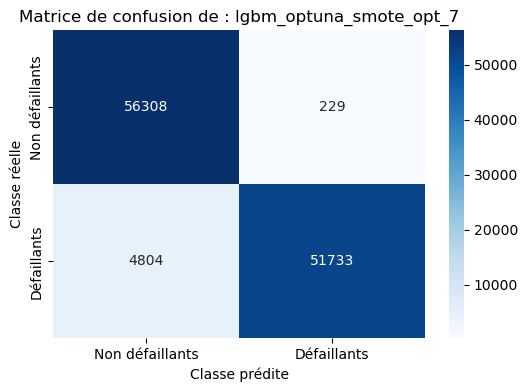

In [89]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_7,
                                        X_train_smote, X_valid_smote,
                                        y_train_smote, y_valid_smote,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_7')

In [90]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_7',
                                        4804, 229, 51733, 56308, df_taux)

Modèle    Recall  Précision        F1       F5  \
18  lgbm_optuna_smote_opt_7_train  0.057603   0.514388  0.103604  0.05964   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
18  0.058114  0.779183  0.270357         47060       0.689848  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
18         0.780929             0.004141         0.193113   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
18             0.002066        0.054028             0.00368   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
18            0.954991                0.002741           0.503443   

    Test_precision_CV +/-  
18               0.027231  

[1 rows x 24 columns]

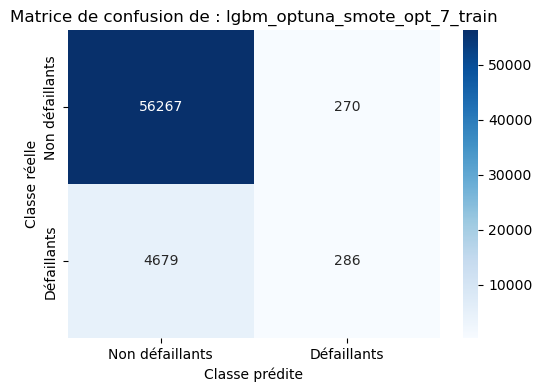

In [91]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_7,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_7_train')

In [92]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_7_train',
                                        4679, 270, 286, 56267, df_taux)

#### <span style='background:LightGreen'>**Optimisation des hyperparamètres - optuna - score F10**</span>

In [93]:
# Modèle et hyperparamètres à étudier
def create_model_6(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'f10_score',
#         class_weight='balanced',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [96]:
# Objective fonction
def objective_6(trial):
    model = create_model_6(trial)
    model.fit(X_train_smote, y_train_smote)
    y_pred_smote = model.predict(X_valid_smote)
    score = fbeta_score(y_valid_smote, y_pred_smote, beta=10)
    return score

In [97]:
# Recherche des paramètres
study_6 = optuna.create_study(direction='maximize')
study_6.optimize(objective_6, n_trials=100)

[I 2024-04-25 20:26:03,260] A new study created in memory with name: no-name-92c02fd4-5b7c-47d2-9483-74e056b8ef5b
[I 2024-04-25 20:26:21,551] Trial 0 finished with value: 0.9144566462560519 and parameters: {'max_depth': 7, 'subsample': 0.4548090953638829, 'colsample_bytree': 0.5451293895959084, 'reg_alpha': 2.70501090981568, 'reg_lambda': 3.484336628433349e-05, 'num_leaves': 157, 'min_child_weight': 0.9871973387726916, 'subsample_freq': 3, 'min_child_samples': 66}. Best is trial 0 with value: 0.9144566462560519.
[I 2024-04-25 20:26:35,965] Trial 1 finished with value: 0.9127633764557972 and parameters: {'max_depth': 10, 'subsample': 0.6631696008462817, 'colsample_bytree': 0.41321315082388355, 'reg_alpha': 2.445739222537719e-06, 'reg_lambda': 0.0009135140534470967, 'num_leaves': 17, 'min_child_weight': 0.7009317236225081, 'subsample_freq': 2, 'min_child_samples': 96}. Best is trial 0 with value: 0.9144566462560519.
[I 2024-04-25 20:26:51,473] Trial 2 finished with value: 0.9153223410693

In [98]:
params_6 = study_6.best_params
print(f'Nombre d\'essai terminés : {len(study_6.trials)}')
print('Best hyperparamètres:\n')
print(params_6)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.13016316718792936, 'colsample_bytree': 0.9104953787884639, 'reg_alpha': 0.0005618312682769179, 'reg_lambda': 1.180877006969565e-08, 'num_leaves': 236, 'min_child_weight': 0.42345957201875345, 'subsample_freq': 4, 'min_child_samples': 18}


In [99]:
param_lgbm_optuna_opt_6 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,    
                           'colsample_bytree': 0.9104953787884639,
                           'max_depth': 11,
                           'min_child_samples': 18,
                           'min_child_weight': 0.42345957201875345,
                           'num_leaves': 236,
                           'reg_alpha': 0.0005618312682769179,
                           'reg_lambda': 1.180877006969565e-08,
                           'subsample': 0.13016316718792936,
                           'subsample_freq': 4,
                           'verbosity' : -1}

In [100]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_smote_opt_6 = LGBMClassifier(**param_lgbm_optuna_opt_6,
                                         force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
19  lgbm_optuna_smote_opt_6  0.917611   0.986237  0.950687  0.920074   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
19  0.918244  0.976799  0.983576         47304       0.928317  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
19         0.973382              0.07953         0.928135   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
19             0.023834        0.911099            0.263032   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
19            0.991698                0.002784           0.986224   

    Test_precision_CV +/-  
19               0.004638  

[1 rows x 24 columns]

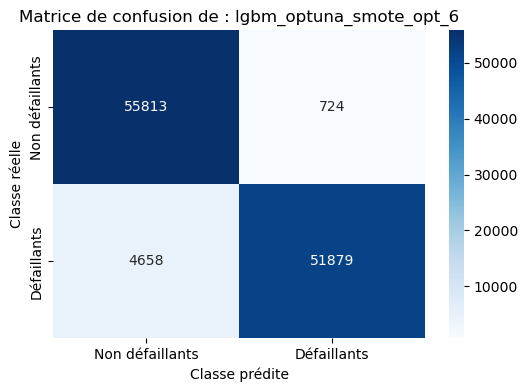

In [101]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_6,
                                        X_train_smote, X_valid_smote,
                                        y_train_smote, y_valid_smote,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_6')

In [102]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_6',
                                        4658, 724, 51879, 55813, df_taux)

Modèle    Recall  Précision       F1        F5  \
20  lgbm_optuna_smote_opt_6_train  0.094864   0.338849  0.14823  0.097566   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
20  0.095545  0.733001  0.209409         45859       0.694244  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
20         0.727415             0.004392         0.218983   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
20             0.005172        0.093907            0.007418   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
20            0.687182                0.006173           0.332984   

    Test_precision_CV +/-  
20               0.024451  

[1 rows x 24 columns]

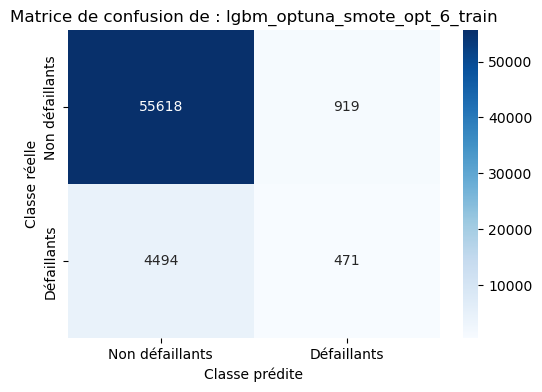

In [103]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_6,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_6_train')

In [104]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_6_train',
                                        4494, 919, 471, 55618, df_taux)

#### <span style='background:Moccasin'>Rééquilibrage - oversampling : SMOTE auto</span>

In [19]:
from collections import Counter

# Répartition des classes au départ
counter_original = Counter(y_train)
print(counter_original)
# Application de l'oversampling via SMOTE avec les paramètres par défaut
oversample = SMOTE(sampling_strategy='auto', k_neighbors=5, n_jobs=-1,
                   random_state=seed)
X_train_smote_1, y_train_smote_1 = \
    oversample.fit_resample(X_train, y_train)
X_valid_smote_1, y_valid_smote_1 = \
    oversample.fit_resample(X_valid, y_valid)
# Répartition après oversampling SMOTE paramètres par défaut
counter_smote_1 = Counter(y_train_smote_1)
print(counter_smote_1)

Counter({0: 226145, 1: 19860})
Counter({0: 226145, 1: 226145})


#### <span style='background:LightGreen'>**Modèle LightGBM - hyperparamètres de base**</span>

In [20]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_smote_base_1 = LGBMClassifier(random_state=seed, verbose=0,
                                   force_col_wise=True)

Modèle    Recall  Précision       F1        F5       F10  \
21  lgbm_smote_base_1  0.913596    0.99672  0.95335  0.916536  0.914351   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
21  0.97962  0.985319         49020       0.926427  ...         0.970339   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
21             0.088778         0.914631              0.02799         0.91067   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
21            0.262977            0.996893                0.001045   

    Test_precision_CV  Test_precision_CV +/-  
21           0.996607               0.001174  

[1 rows x 24 columns]

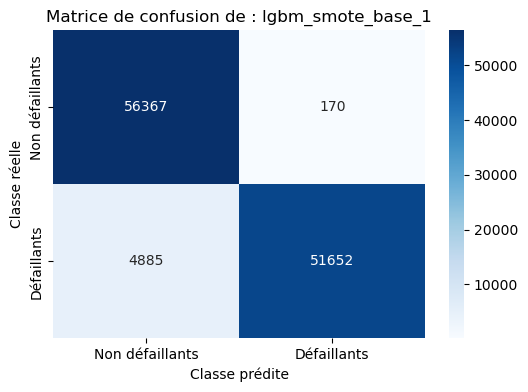

In [107]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_1,
                                        X_train_smote_1, X_valid_smote_1,
                                        y_train_smote_1, y_valid_smote_1,
                                        df_resultats,
                                        'lgbm_smote_base_1')

In [108]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_base_1',
                                        4885, 170, 51652, 56367, df_taux)

Modèle    Recall  Précision        F1       F5       F10  \
22  lgbm_smote_base_1_train  0.042296   0.578512  0.078829  0.04386  0.042688   
23  lgbm_smote_base_1_train  0.042296   0.578512  0.078829  0.04386  0.042688   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
22  0.781519  0.276539         47703       0.686258  ...         0.784181   
23  0.781519  0.276539         47703       0.686258  ...         0.784181   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
22             0.004946         0.059483             0.002252        0.040836   
23             0.004946         0.059483             0.002252        0.040836   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
22            0.004557            0.763636                0.006599   
23            0.004557            0.763636                0.006599   

    Test_precision_CV  Test_precision_CV +/-  
22           0.565895               0.043276  
23           0.565895               0.043276  

[2 rows x 24 columns]

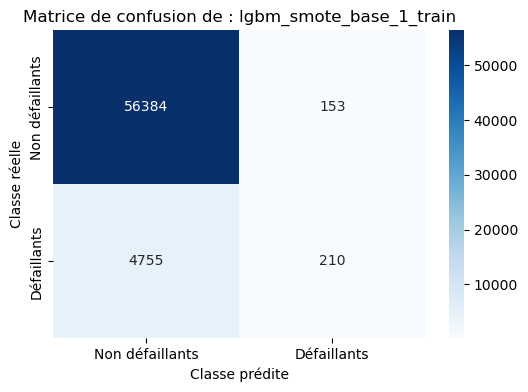

In [21]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_1,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_smote_base_1_train')

In [25]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_base_1_train',
                                        4755, 153, 210, 56384, df_taux)

#### <span style='background:LightGreen'>**Optimisation des hyperparamètres - optuna - score ROC_AUC**</span>

In [26]:
# Modèle et hyperparamètres à étudier
def create_model_8(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'auc',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [27]:
# Objective fonction
def objective_8(trial):
    model = create_model_8(trial)
    model.fit(X_train_smote_1, y_train_smote_1)
    y_proba_smote_1 = model.predict_proba(X_valid_smote_1)[:,1]
    score = roc_auc_score(y_valid_smote_1, y_proba_smote_1)
    return score

In [28]:
# Recherche des paramètres
study_8 = optuna.create_study(direction='maximize')
study_8.optimize(objective_8, n_trials=100)

[I 2024-04-25 21:49:55,716] A new study created in memory with name: no-name-ac4a52d7-7b8b-43de-8a44-35440ffbda4b
[I 2024-04-25 21:50:10,422] Trial 0 finished with value: 0.9785171246962803 and parameters: {'max_depth': 6, 'subsample': 0.2787220351097556, 'colsample_bytree': 0.41224568705277864, 'reg_alpha': 1.3166626885075108e-05, 'reg_lambda': 1.3257908512067303e-07, 'num_leaves': 175, 'min_child_weight': 0.5400761472942225, 'subsample_freq': 7, 'min_child_samples': 67}. Best is trial 0 with value: 0.9785171246962803.
[I 2024-04-25 21:50:23,124] Trial 1 finished with value: 0.97744654205759 and parameters: {'max_depth': 4, 'subsample': 0.851022455813819, 'colsample_bytree': 0.9768710669659916, 'reg_alpha': 0.021513439007740744, 'reg_lambda': 1.9537894037335072e-07, 'num_leaves': 149, 'min_child_weight': 0.9584156424687761, 'subsample_freq': 4, 'min_child_samples': 72}. Best is trial 0 with value: 0.9785171246962803.
[I 2024-04-25 21:50:45,692] Trial 2 finished with value: 0.978709921

In [29]:
params_8 = study_8.best_params
print(f'Nombre d\'essai terminés : {len(study_8.trials)}')
print('Best hyperparamètres:\n')
print(params_8)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.8606934048977856, 'colsample_bytree': 0.879252387056556, 'reg_alpha': 0.8768227316627086, 'reg_lambda': 1.9722726031261283e-06, 'num_leaves': 177, 'min_child_weight': 0.7297650224015692, 'subsample_freq': 7, 'min_child_samples': 74}


In [30]:
param_lgbm_optuna_opt_8 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,    
                           'colsample_bytree': 0.879252387056556,
                           'max_depth': 11,
                           'min_child_samples': 74,
                           'min_child_weight': 0.7297650224015692,
                           'num_leaves': 177,
                           'reg_alpha': 0.8768227316627086,
                           'reg_lambda': 1.9722726031261283e-06,
                           'subsample': 0.8606934048977856,
                           'subsample_freq': 7,
                           'verbosity' : -1}

In [31]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_smote_opt_8 = LGBMClassifier(**param_lgbm_optuna_opt_8,
                                         force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
23  lgbm_optuna_smote_opt_8  0.915135   0.995459  0.953609  0.917984   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
23  0.915867  0.979823  0.985475         48216       0.927549  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
23         0.972509              0.08238          0.92493   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
23             0.024945        0.911564            0.263172   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
23            0.998362                0.000551           0.995032   

    Test_precision_CV +/-  
23                 0.0018  

[1 rows x 24 columns]

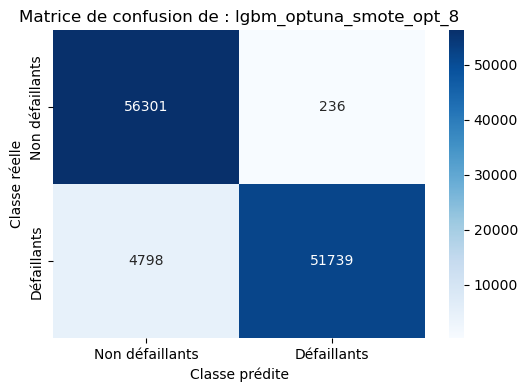

In [32]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_8,
                                        X_train_smote_1, X_valid_smote_1,
                                        y_train_smote_1, y_valid_smote_1,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_8')

In [33]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_8',
                                        4798, 236, 51739, 56301, df_taux)

Modèle    Recall  Précision        F1        F5  \
24  lgbm_optuna_smote_opt_8_train  0.059416   0.512153  0.106479  0.061507   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
24  0.059941  0.777891  0.268772         46981       0.690308  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
24         0.780008             0.004512           0.2119   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
24             0.002282         0.05423            0.002172   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
24            0.961074                0.003335           0.510795   

    Test_precision_CV +/-  
24               0.024137  

[1 rows x 24 columns]

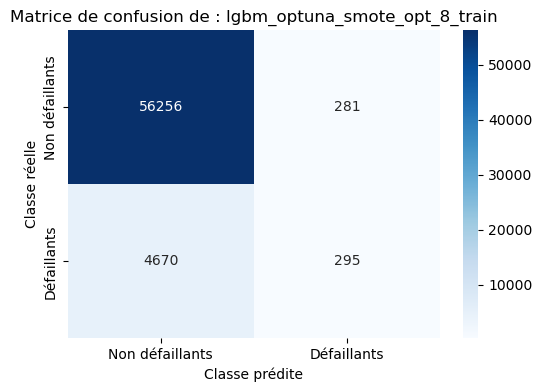

In [34]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_8,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_8_train')

In [35]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_8_train',
                                        4670, 281, 295, 56256, df_taux)

#### <span style='background:Moccasin'>Rééquilibrage - combinaison oversampling/undersampling : SMOTE</span>

In [40]:
# Répartition des classes au départ
counter_original = Counter(y_train)
print(counter_original)

# define pipeline
over = SMOTE(sampling_strategy=0.1, random_state=seed)
under = RandomUnderSampler(sampling_strategy=0.5, random_state=seed)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_train_smote_combi, y_train_smote_combi = \
    pipeline.fit_resample(X_train, y_train)
X_valid_smote_combi, y_valid_smote_combi = \
    pipeline.fit_resample(X_valid, y_valid)
# Répartition après oversampling SMOTE paramètres par défaut
counter_smote_combi = Counter(y_train_smote_combi)
print(counter_smote_combi)

Counter({0: 226145, 1: 19860})
Counter({0: 45228, 1: 22614})


#### <span style='background:LightGreen'>**Modèle LightGBM - hyperparamètres de base**</span>

In [41]:
# Initialisation du modèle avec les hyperparamètres de base
lgbm_smote_base_2 = LGBMClassifier(random_state=seed, verbose=0,
                                   force_col_wise=True)

Modèle   Recall  Précision        F1        F5      F10  \
25  lgbm_smote_combi_base  0.49885   0.707299  0.585062  0.504569  0.50031   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
25  0.804837  0.708098         29497       0.604965  ...         0.805114   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
25             0.052876         0.564154             0.005931        0.495829   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
25             0.13674            0.773663                0.010619   

    Test_precision_CV  Test_precision_CV +/-  
25           0.693007               0.032145  

[1 rows x 24 columns]

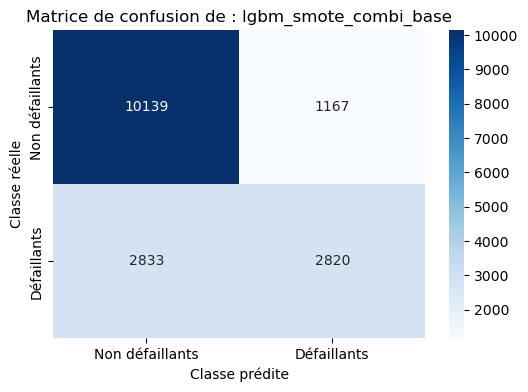

In [42]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_2,
                                        X_train_smote_combi,
                                        X_valid_smote_combi,
                                        y_train_smote_combi,
                                        y_valid_smote_combi,
                                        df_resultats,
                                        'lgbm_smote_combi_base')

In [43]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_combi_base',
                                        2833, 1167, 2820, 10139, df_taux)

Modèle    Recall  Précision        F1       F5  \
26  lgbm_smote_combi_base_train  0.042296   0.578512  0.078829  0.04386   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
26  0.042688  0.781519  0.276539         47703       0.686258  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
26         0.784181             0.004946         0.059483   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
26             0.002252        0.040836            0.004557   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
26            0.763636                0.006599           0.565895   

    Test_precision_CV +/-  
26               0.043276  

[1 rows x 24 columns]

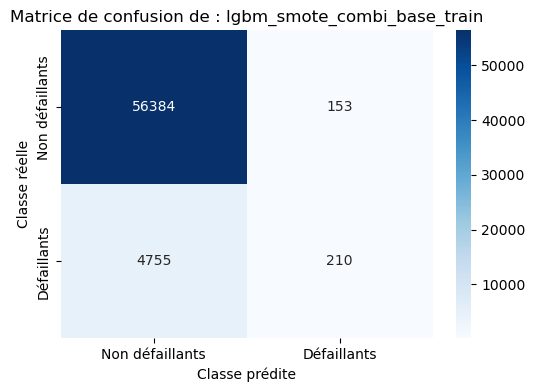

In [44]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_smote_base_2,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_smote_combi_base_train')

In [45]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_smote_combi_base_train',
                                        4755, 153, 210, 56384, df_taux)

#### <span style='background:LightGreen'>**Optimisation des hyperparamètres - optuna - score ROC_AUC**</span>

In [46]:
# Modèle et hyperparamètres à étudier
def create_model_9(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'auc',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [47]:
# Objective fonction
def objective_9(trial):
    model = create_model_9(trial)
    model.fit(X_train_smote_combi, y_train_smote_combi)
    y_proba_smote_combi = model.predict_proba(X_valid_smote_combi)[:,1]
    score = roc_auc_score(y_valid_smote_combi, y_proba_smote_combi)
    return score

In [48]:
# Recherche des paramètres
study_9 = optuna.create_study(direction='maximize')
study_9.optimize(objective_9, n_trials=100)

[I 2024-04-25 22:54:01,998] A new study created in memory with name: no-name-fcf6be35-7e83-4775-8bf1-9910dcf8c850
[I 2024-04-25 22:54:09,028] Trial 0 finished with value: 0.7981392089455358 and parameters: {'max_depth': 9, 'subsample': 0.6338901655041415, 'colsample_bytree': 0.8284192342002107, 'reg_alpha': 0.005739681886854563, 'reg_lambda': 0.0014809979399400552, 'num_leaves': 171, 'min_child_weight': 0.6408550721006017, 'subsample_freq': 1, 'min_child_samples': 14}. Best is trial 0 with value: 0.7981392089455358.
[I 2024-04-25 22:54:10,783] Trial 1 finished with value: 0.7943745806983507 and parameters: {'max_depth': 3, 'subsample': 0.7518952856653577, 'colsample_bytree': 0.530055031585318, 'reg_alpha': 1.2750817448631195e-05, 'reg_lambda': 6.684609434825523e-08, 'num_leaves': 87, 'min_child_weight': 0.8095905376883551, 'subsample_freq': 6, 'min_child_samples': 97}. Best is trial 0 with value: 0.7981392089455358.
[I 2024-04-25 22:54:12,944] Trial 2 finished with value: 0.79905192100

In [49]:
params_9 = study_9.best_params
print(f'Nombre d\'essai terminés : {len(study_9.trials)}')
print('Best hyperparamètres:\n')
print(params_9)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 10, 'subsample': 0.9710594069818788, 'colsample_bytree': 0.9784034169532762, 'reg_alpha': 0.8868740342334243, 'reg_lambda': 4.151331898845896e-05, 'num_leaves': 26, 'min_child_weight': 0.771576487622768, 'subsample_freq': 4, 'min_child_samples': 84}


In [50]:
param_lgbm_optuna_opt_9 = {'objective' : 'binary',
                           'boosting_type' : 'gbdt',
                           'n_jobs' : -1,    
                           'colsample_bytree': 0.9784034169532762,
                           'max_depth': 10,
                           'min_child_samples': 84,
                           'min_child_weight': 0.771576487622768,
                           'num_leaves': 26,
                           'reg_alpha': 0.8868740342334243,
                           'reg_lambda': 4.151331898845896e-05,
                           'subsample': 0.9710594069818788,
                           'subsample_freq': 4,
                           'verbosity' : -1}

In [51]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_smote_opt_9 = LGBMClassifier(**param_lgbm_optuna_opt_9,
                                         force_col_wise=True)

Modèle    Recall  Précision        F1       F5       F10  \
27  lgbm_optuna_smote_opt_9  0.499558   0.702488  0.583893  0.50517  0.500991   

     ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
27  0.804303  0.705213         29486         0.6048  ...         0.803327   

    Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
27             0.047355          0.55277              0.00583        0.492734   

    Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
27            0.122107            0.760081                0.011555   

    Test_precision_CV  Test_precision_CV +/-  
27           0.692441               0.029387  

[1 rows x 24 columns]

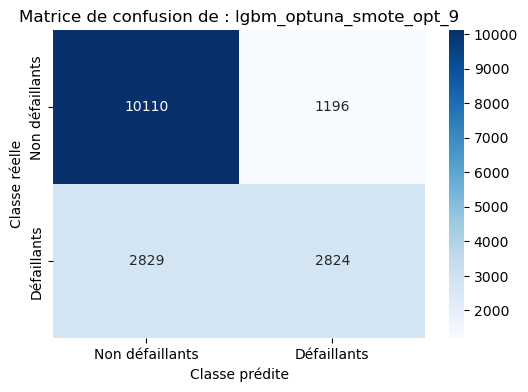

In [52]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_9,
                                        X_train_smote_combi,
                                        X_valid_smote_combi,
                                        y_train_smote_combi,
                                        y_valid_smote_combi,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_9')

In [53]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_9',
                                        2829, 1196, 2824, 10110, df_taux)

Modèle    Recall  Précision        F1        F5  \
28  lgbm_optuna_smote_opt_9_train  0.041088   0.584527  0.076778  0.042611   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
28  0.041469  0.782691  0.277618         47755        0.68596  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
28         0.785055              0.00402         0.055018   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
28             0.001564        0.039577            0.004544   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
28            0.726053                0.005705           0.552611   

    Test_precision_CV +/-  
28               0.051388  

[1 rows x 24 columns]

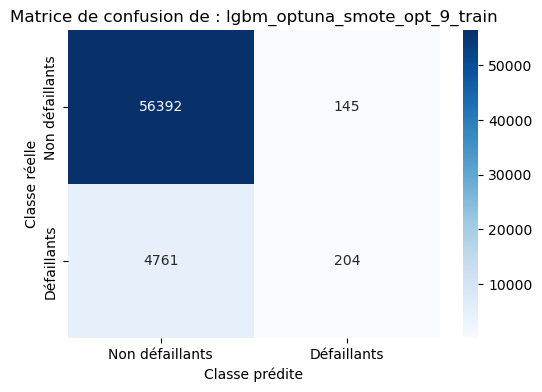

In [54]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_9,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_9_train')

In [55]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_9_train',
                                        4761, 145, 204, 56392, df_taux)

#### <span style='background:LightGreen'>**Optimisation des hyperparamètres - optuna - score F10**</span>

In [56]:
# Modèle et hyperparamètres à étudier
def create_model_10(trial):
    max_depth = trial.suggest_int('max_depth', 3, 11)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    reg_alpha = trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
    reg_lambda = trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
    num_leaves = trial.suggest_int('num_leaves', 2, 256),
    min_child_weight = trial.suggest_uniform('min_child_weight', 0.4, 1.0),
    subsample_freq = trial.suggest_int('subsample_freq', 1, 7),
    min_child_samples = trial.suggest_int('min_child_samples', 5, 100),
            
    model = LGBMClassifier(
        objective = 'binary',
        metric = 'f10_score',
        max_depth=max_depth, 
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        num_leaves=num_leaves,
        min_child_weight=min_child_weight,
        subsample=subsample,
        subsample_freq=subsample_freq,
        min_child_samples=min_child_samples,
        random_state=seed,
        verbose=-1)
        
    return model

In [59]:
# Objective fonction
def objective_10(trial):
    model = create_model_10(trial)
    model.fit(X_train_smote_combi, y_train_smote_combi)
    y_pred_smote_combi = model.predict(X_valid_smote_combi)
    score = fbeta_score(y_valid_smote_combi, y_pred_smote_combi, beta = 10)
    return score

In [60]:
# Recherche des paramètres
study_10 = optuna.create_study(direction='maximize')
study_10.optimize(objective_10, n_trials=100)

[I 2024-04-25 23:09:13,655] A new study created in memory with name: no-name-121f852d-4d31-4bc9-bdd0-ce76d1212a3d
[I 2024-04-25 23:09:15,709] Trial 0 finished with value: 0.49725642421794036 and parameters: {'max_depth': 11, 'subsample': 0.20091727869488213, 'colsample_bytree': 0.8601906399175134, 'reg_alpha': 0.9734523296305729, 'reg_lambda': 0.003012627259764291, 'num_leaves': 21, 'min_child_weight': 0.6590345050379387, 'subsample_freq': 3, 'min_child_samples': 16}. Best is trial 0 with value: 0.49725642421794036.
[I 2024-04-25 23:09:17,557] Trial 1 finished with value: 0.47069532699769445 and parameters: {'max_depth': 4, 'subsample': 0.6007926244311862, 'colsample_bytree': 0.29473633426825296, 'reg_alpha': 0.4339998378240778, 'reg_lambda': 3.2535304194282008e-06, 'num_leaves': 107, 'min_child_weight': 0.5052233507256898, 'subsample_freq': 2, 'min_child_samples': 31}. Best is trial 0 with value: 0.49725642421794036.
[I 2024-04-25 23:09:20,204] Trial 2 finished with value: 0.496081707

In [61]:
params_10 = study_10.best_params
print(f'Nombre d\'essai terminés : {len(study_10.trials)}')
print('Best hyperparamètres:\n')
print(params_10)

Nombre d'essai terminés : 100
Best hyperparamètres:

{'max_depth': 11, 'subsample': 0.7464895456031369, 'colsample_bytree': 0.9903795570930475, 'reg_alpha': 3.742946751762846, 'reg_lambda': 3.2086982672485705e-05, 'num_leaves': 93, 'min_child_weight': 0.6347242117936363, 'subsample_freq': 4, 'min_child_samples': 46}


In [62]:
param_lgbm_optuna_opt_10 = {'objective' : 'binary',
                            'boosting_type' : 'gbdt',
                            'n_jobs' : -1,    
                            'colsample_bytree': 0.9903795570930475,
                            'max_depth': 11,
                            'min_child_samples': 46,
                            'min_child_weight': 0.6347242117936363,
                            'num_leaves': 93,
                            'reg_alpha': 3.742946751762846,
                            'reg_lambda': 3.2086982672485705e-05,
                            'subsample': 0.7464895456031369,
                            'subsample_freq': 4,
                            'verbosity' : -1}

In [63]:
# Initialisation du modèle avec les hyperparamètres précédemment trouvés
lgbm_optuna_smote_opt_10 = LGBMClassifier(**param_lgbm_optuna_opt_10,
                                          force_col_wise=True)

Modèle    Recall  Précision        F1        F5  \
29  lgbm_optuna_smote_opt_10  0.506634   0.698707  0.587367  0.512048   

         F10  ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
29  0.508016  0.80147  0.700215         29125       0.609069  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
29         0.804149             0.050375          0.65598   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
29             0.005089        0.503656            0.130656   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
29            0.850272                 0.00874           0.684925   

    Test_precision_CV +/-  
29               0.031982  

[1 rows x 24 columns]

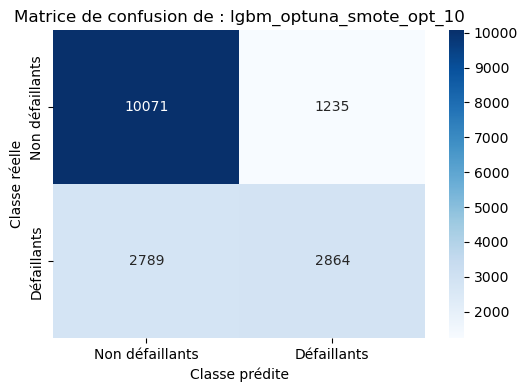

In [64]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_10,
                                        X_train_smote_combi,
                                        X_valid_smote_combi,
                                        y_train_smote_combi,
                                        y_valid_smote_combi,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_10')

In [65]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_10',
                                        2789, 1235, 2864, 10071, df_taux)

Modèle    Recall  Précision        F1        F5  \
30  lgbm_optuna_smote_opt_10_train  0.055388   0.529865  0.100292  0.057363   

         F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
30  0.055883  0.781666  0.274507         47144       0.689437  ...   

    Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  \
30         0.784017             0.003949         0.118468   

    Train_recall_CV +/-  Test_recall_CV  Test_recall_CV +/-  \
30             0.001098        0.049899            0.006939   

    Train_precision_CV  Train_precision_CV +/-  Test_precision_CV  \
30            0.870553                 0.00555           0.512445   

    Test_precision_CV +/-  
30                0.04584  

[1 rows x 24 columns]

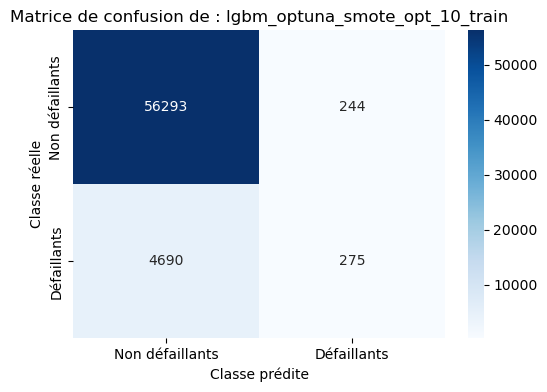

In [66]:
# Entraînement, prédictions, scoring sur le jeu d'entraînement
df_resultats = process_classification(lgbm_optuna_smote_opt_10,
                                        X_train, X_valid,
                                        y_train, y_valid,
                                        df_resultats,
                                        'lgbm_optuna_smote_opt_10_train')

In [67]:
# Sauvegarde
df_taux = sauvegarder_taux('lgbm_optuna_smote_opt_10_train',
                                        4690, 244, 275, 56293, df_taux)

### <span style='background:PowderBlue'>Bilan - Modélisations</span>

**Les différents taux des matrices de confusion**

In [68]:
df_taux_comp1 = df_taux.sort_values(by='Modèle')

In [69]:
df_taux_comp1

Modèle    FN     FP     TP     TN
0               lgbm_hyperparam_base  4755    153    210  56384
1           lgbm_hyperparam_base_bal  1570  15032   3395  41505
4        lgbm_hyperparam_base_minmax  4746    157    219  56380
5        lgbm_hyperparam_base_robust  4750    147    215  56390
2           lgbm_hyperparam_base_std  4766    173    199  56364
3       lgbm_hyperparam_base_std_bal  1516  15054   3449  41483
9                  lgbm_optuna_opt_1  1617  14209   3348  42328
10                 lgbm_optuna_opt_2  1670  13068   3295  43469
11                 lgbm_optuna_opt_3  2176   9840   2789  46697
12                 lgbm_optuna_opt_4  1624  14112   3341  42425
13                 lgbm_optuna_opt_5  1481  16673   3484  39864
14                lgbm_optuna_opt_F1  2229   9425   2736  47112
15                lgbm_optuna_opt_F5  1516  15432   3449  41105
29          lgbm_optuna_smote_opt_10  2789   1235   2864  10071
30    lgbm_optuna_smote_opt_10_train  4690    244    275  56293
19           lgbm_optuna_smote_opt_6  4658    724  51879  55813
20     lgbm_optuna_smote_opt_6_train  4494    919    471  55618
17           lgbm_optuna_smote_opt_7  4804    229  51733  56308
18     lgbm_optuna_smote_opt_7_train  4679    270    286  56267
23           lgbm_optuna_smote_opt_8  4798    236  51739  56301
24     lgbm_optuna_smote_opt_8_train  4670    281    295  56256
27           lgbm_optuna_smote_opt_9  2829   1196   2824  10110
28     lgbm_optuna_smote_opt_9_train  4761    145    204  56392
21                 lgbm_smote_base_1  4885    170  51652  56367
22           lgbm_smote_base_1_train  4755    153    210  56384
8                lgbm_smote_base_bal  4906    168  51631  56369
16         lgbm_smote_base_bal_train  1570  15032   3395  41505
25             lgbm_smote_combi_base  2833   1167   2820  10139
26       lgbm_smote_combi_base_train  4755    153    210  56384
6         lgbm_smote_hyperparam_base  4906    168  51631  56369
7   lgbm_smote_hyperparam_base_train  4755    153    210  56384

In [72]:
modeles = ['lgbm_hyperparam_base', 
           'lgbm_hyperparam_base_bal',
           'lgbm_hyperparam_base_minmax', 
           'lgbm_hyperparam_base_robust',
           'lgbm_hyperparam_base_std', 
           'lgbm_hyperparam_base_std_bal',
           'lgbm_optuna_opt_1', 
           'lgbm_optuna_opt_2', 
           'lgbm_optuna_opt_3',
           'lgbm_optuna_opt_4', 
           'lgbm_optuna_opt_5',
           'lgbm_optuna_opt_F1', 
           'lgbm_optuna_opt_F5',
           'lgbm_optuna_smote_opt_10', 
           'lgbm_optuna_smote_opt_10_train',
           'lgbm_optuna_smote_opt_6', 
           'lgbm_optuna_smote_opt_6_train',
           'lgbm_optuna_smote_opt_7',
           'lgbm_optuna_smote_opt_7_train',
           'lgbm_optuna_smote_opt_8', 
           'lgbm_optuna_smote_opt_8_train',
           'lgbm_optuna_smote_opt_9', 
           'lgbm_optuna_smote_opt_9_train',
           'lgbm_smote_base_1', 
           'lgbm_smote_base_1_train',
           'lgbm_smote_base_bal', 
           'lgbm_smote_base_bal_train',
           'lgbm_smote_combi_base', 
           'lgbm_smote_combi_base_train',
           'lgbm_smote_hyperparam_base',
           'lgbm_smote_hyperparam_base_train']

print(len(modeles))

31


In [73]:
jeu_donnees = ['train', 
               'train',
               'train', 
               'train', 
               'train', 
               'train', 
               'train', 
               'train', 
               'train', 
               'train',
               'train', 
               'train', 
               'train', 
               'reduit',
               'train', 
               'augmente', 
               'train', 
               'augmente', 
               'train',
               'augmente',
               'train', 
               'reduit', 
               'train', 
               'augmente', 
               'train', 
               'augmente', 
               'train', 
               'reduit', 
               'train', 
               'augmente', 
               'train']
print(len(jeu_donnees))

31


In [74]:
df_taux_comp2 = pd.DataFrame({'Modèle' : modeles,
                              'Jeu_donnees' : jeu_donnees})

In [75]:
# Dataframe de sauvegarde des taux des différentes modélisations
df_taux_comp = df_taux_comp2.merge(df_taux_comp1, on='Modèle',
                                   how='right')
df_taux_comp

Modèle Jeu_donnees    FN     FP     TP     TN
0               lgbm_hyperparam_base       train  4755    153    210  56384
1           lgbm_hyperparam_base_bal       train  1570  15032   3395  41505
2        lgbm_hyperparam_base_minmax       train  4746    157    219  56380
3        lgbm_hyperparam_base_robust       train  4750    147    215  56390
4           lgbm_hyperparam_base_std       train  4766    173    199  56364
5       lgbm_hyperparam_base_std_bal       train  1516  15054   3449  41483
6                  lgbm_optuna_opt_1       train  1617  14209   3348  42328
7                  lgbm_optuna_opt_2       train  1670  13068   3295  43469
8                  lgbm_optuna_opt_3       train  2176   9840   2789  46697
9                  lgbm_optuna_opt_4       train  1624  14112   3341  42425
10                 lgbm_optuna_opt_5       train  1481  16673   3484  39864
11                lgbm_optuna_opt_F1       train  2229   9425   2736  47112
12                lgbm_optuna_opt_F5       train  1516  15432   3449  41105
13          lgbm_optuna_smote_opt_10      reduit  2789   1235   2864  10071
14    lgbm_optuna_smote_opt_10_train       train  4690    244    275  56293
15           lgbm_optuna_smote_opt_6    augmente  4658    724  51879  55813
16     lgbm_optuna_smote_opt_6_train       train  4494    919    471  55618
17           lgbm_optuna_smote_opt_7    augmente  4804    229  51733  56308
18     lgbm_optuna_smote_opt_7_train       train  4679    270    286  56267
19           lgbm_optuna_smote_opt_8    augmente  4798    236  51739  56301
20     lgbm_optuna_smote_opt_8_train       train  4670    281    295  56256
21           lgbm_optuna_smote_opt_9      reduit  2829   1196   2824  10110
22     lgbm_optuna_smote_opt_9_train       train  4761    145    204  56392
23                 lgbm_smote_base_1    augmente  4885    170  51652  56367
24           lgbm_smote_base_1_train       train  4755    153    210  56384
25               lgbm_smote_base_bal    augmente  4906    168  51631  56369
26         lgbm_smote_base_bal_train       train  1570  15032   3395  41505
27             lgbm_smote_combi_base      reduit  2833   1167   2820  10139
28       lgbm_smote_combi_base_train       train  4755    153    210  56384
29        lgbm_smote_hyperparam_base    augmente  4906    168  51631  56369
30  lgbm_smote_hyperparam_base_train       train  4755    153    210  56384

In [76]:
# Tri par Faux Négatifs décroissant (les clients prédits non défaillants
# qui sont défaillants ==> la banque perd le montant du prêt en totalité
# ou en partie) pour le train set
mask = df_taux_comp['Jeu_donnees'] == 'train'
df_taux_comp[mask].sort_values(by='FN').style.highlight_min(subset=['FN', 'FP', 'TN', 'TP'], color='lightgreen', axis=0)

**Constitution des dataframes de comparaison pour les résultats**

In [77]:
df_resultats_comp1 = df_resultats.sort_values(by='Modèle')

In [80]:
modeles

['lgbm_hyperparam_base',
 'lgbm_hyperparam_base_bal',
 'lgbm_hyperparam_base_minmax',
 'lgbm_hyperparam_base_robust',
 'lgbm_hyperparam_base_std',
 'lgbm_hyperparam_base_std_bal',
 'lgbm_optuna_opt_1',
 'lgbm_optuna_opt_2',
 'lgbm_optuna_opt_3',
 'lgbm_optuna_opt_4',
 'lgbm_optuna_opt_5',
 'lgbm_optuna_opt_F1',
 'lgbm_optuna_opt_F5',
 'lgbm_optuna_smote_opt_10',
 'lgbm_optuna_smote_opt_10_train',
 'lgbm_optuna_smote_opt_6',
 'lgbm_optuna_smote_opt_6_train',
 'lgbm_optuna_smote_opt_7',
 'lgbm_optuna_smote_opt_7_train',
 'lgbm_optuna_smote_opt_8',
 'lgbm_optuna_smote_opt_8_train',
 'lgbm_optuna_smote_opt_9',
 'lgbm_optuna_smote_opt_9_train',
 'lgbm_smote_base_1',
 'lgbm_smote_base_1_train',
 'lgbm_smote_base_bal',
 'lgbm_smote_base_bal_train',
 'lgbm_smote_combi_base',
 'lgbm_smote_combi_base_train',
 'lgbm_smote_hyperparam_base',
 'lgbm_smote_hyperparam_base_train']

In [81]:
metrique = ['logloss', 'logloss', 'logloss', 'logloss', 'logloss',  'logloss', 'roc_auc', 'roc_auc', 'custom', 'pr_auc', 
            'F10', 'F1', 'F5', 'F10', 'F10', 'F10', 'F10', 'roc_auc', 'roc_auc', 'roc_auc', 
            'roc_auc', 'roc_auc', 'roc_auc', 'logloss', 'logloss', 'logloss', 'logloss', 
            'logloss',
            'logloss', 'logloss', 'logloss']

optimisation = ['aucune', 'aucune', 'minmax', 'robust', 'std', 'std', 'optuna', 'optuna', 'optuna', 'optuna', 
                'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 'optuna', 
                'optuna', 'optuna', 'optuna','smoteover', 'smoteover', 'smoteover', 'smoteover', 
                'smoteoverunder', 'smoteoverunder',
                'smoteover', 'smoteover']

class_weight = ['non', 'oui', 'non', 'non', 'non', 'oui', 'oui', 'oui', 'oui', 'oui', 
                'oui', 'oui', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 'non', 
                'non', 'non', 'non', 'non', 'non', 'non', 'non', 
                'non', 'non', 'non', 'non']

print(len(metrique), len(optimisation), len(class_weight))

31 31 31


In [82]:
df_resultats_comp2 = pd.DataFrame({'Modèle' : modeles,
                                   'Metrique' : metrique,
                                   'Optimisation' : optimisation,
                                   'Class_weight' : class_weight})

In [83]:
# Dataframe de sauvegarde des résultats de la modélisation
df_resultats_comp = df_resultats_comp2.merge(df_resultats_comp1, on='Modèle', how='left')

In [84]:
# Dataframe de recueil de tous les résultats
df_comparaison = df_taux_comp.merge(df_resultats_comp, on='Modèle', how='left')

In [85]:
df_comparaison

Modèle Jeu_donnees    FN     FP     TP     TN  \
0               lgbm_hyperparam_base       train  4755    153    210  56384   
1           lgbm_hyperparam_base_bal       train  1570  15032   3395  41505   
2        lgbm_hyperparam_base_minmax       train  4746    157    219  56380   
3        lgbm_hyperparam_base_robust       train  4750    147    215  56390   
4           lgbm_hyperparam_base_std       train  4766    173    199  56364   
5       lgbm_hyperparam_base_std_bal       train  1516  15054   3449  41483   
6                  lgbm_optuna_opt_1       train  1617  14209   3348  42328   
7                  lgbm_optuna_opt_2       train  1670  13068   3295  43469   
8                  lgbm_optuna_opt_3       train  2176   9840   2789  46697   
9                  lgbm_optuna_opt_4       train  1624  14112   3341  42425   
10                 lgbm_optuna_opt_5       train  1481  16673   3484  39864   
11                lgbm_optuna_opt_F1       train  2229   9425   2736  47112   
12                lgbm_optuna_opt_F5       train  1516  15432   3449  41105   
13          lgbm_optuna_smote_opt_10      reduit  2789   1235   2864  10071   
14    lgbm_optuna_smote_opt_10_train       train  4690    244    275  56293   
15           lgbm_optuna_smote_opt_6    augmente  4658    724  51879  55813   
16     lgbm_optuna_smote_opt_6_train       train  4494    919    471  55618   
17           lgbm_optuna_smote_opt_7    augmente  4804    229  51733  56308   
18     lgbm_optuna_smote_opt_7_train       train  4679    270    286  56267   
19           lgbm_optuna_smote_opt_8    augmente  4798    236  51739  56301   
20     lgbm_optuna_smote_opt_8_train       train  4670    281    295  56256   
21           lgbm_optuna_smote_opt_9      reduit  2829   1196   2824  10110   
22     lgbm_optuna_smote_opt_9_train       train  4761    145    204  56392   
23                 lgbm_smote_base_1    augmente  4885    170  51652  56367   
24           lgbm_smote_base_1_train       train  4755    153    210  56384   
25               lgbm_smote_base_bal    augmente  4906    168  51631  56369   
26         lgbm_smote_base_bal_train       train  1570  15032   3395  41505   
27             lgbm_smote_combi_base      reduit  2833   1167   2820  10139   
28       lgbm_smote_combi_base_train       train  4755    153    210  56384   
29        lgbm_smote_hyperparam_base    augmente  4906    168  51631  56369   
30  lgbm_smote_hyperparam_base_train       train  4755    153    210  56384   

   Metrique    Optimisation Class_weight    Recall  ...  Test_roc_auc_CV  \
0   logloss          aucune          non  0.042296  ...         0.784181   
1   logloss          aucune          oui  0.683787  ...         0.785470   
2   logloss          minmax          non  0.044109  ...         0.783862   
3   logloss          robust          non  0.043303  ...         0.783716   
4   logloss             std          non  0.040081  ...         0.783472   
5   logloss             std          oui  0.694663  ...         0.785640   
6   roc_auc          optuna          oui  0.674320  ...         0.785138   
7   roc_auc          optuna          oui  0.663646  ...         0.789872   
8    custom          optuna          oui  0.561732  ...         0.778193   
9    pr_auc          optuna          oui  0.672910  ...         0.783964   
10      F10          optuna          oui  0.701712  ...         0.776083   
11       F1          optuna          oui  0.551057  ...         0.775293   
12       F5          optuna          non  0.694663  ...         0.784778   
13      F10          optuna          non  0.506634  ...         0.804149   
14      F10          optuna          non  0.055388  ...         0.784017   
15      F10          optuna          non  0.917611  ...         0.973382   
16      F10          optuna          non  0.094864  ...         0.727415   
17  roc_auc          optuna          non  0.915029  ...         0.971667   
18  roc_auc          optuna          non  0.057603  ...  

In [86]:
# Les vraies répartition de la TARGET dans le jeu de validation
Counter(y_valid)

Counter({0: 56537, 1: 4965})

- Nombre de vrais non-défaillants : 56537 (TN).
- Nombre de vrais défaillants : 4965 (TP).

In [87]:
df_comp = df_comparaison.sort_values(by='FN')
df_comp.style.highlight_min(subset=['FN', 'FP', 'TN', 'TP'], color='lightgreen', axis=0)

In [88]:
df_comp.head(4).style.highlight_min(subset=['FN', 'FP', 'TN', 'TP'], color='lightgreen', axis=0)

**Bilan des taux FN, FP, TN et TP**

Modèle Metrique Optimisation Class_weight
10             lgbm_optuna_opt_5      F10       optuna          oui
12            lgbm_optuna_opt_F5       F5       optuna          non
5   lgbm_hyperparam_base_std_bal  logloss          std          oui
1       lgbm_hyperparam_base_bal  logloss       aucune          oui

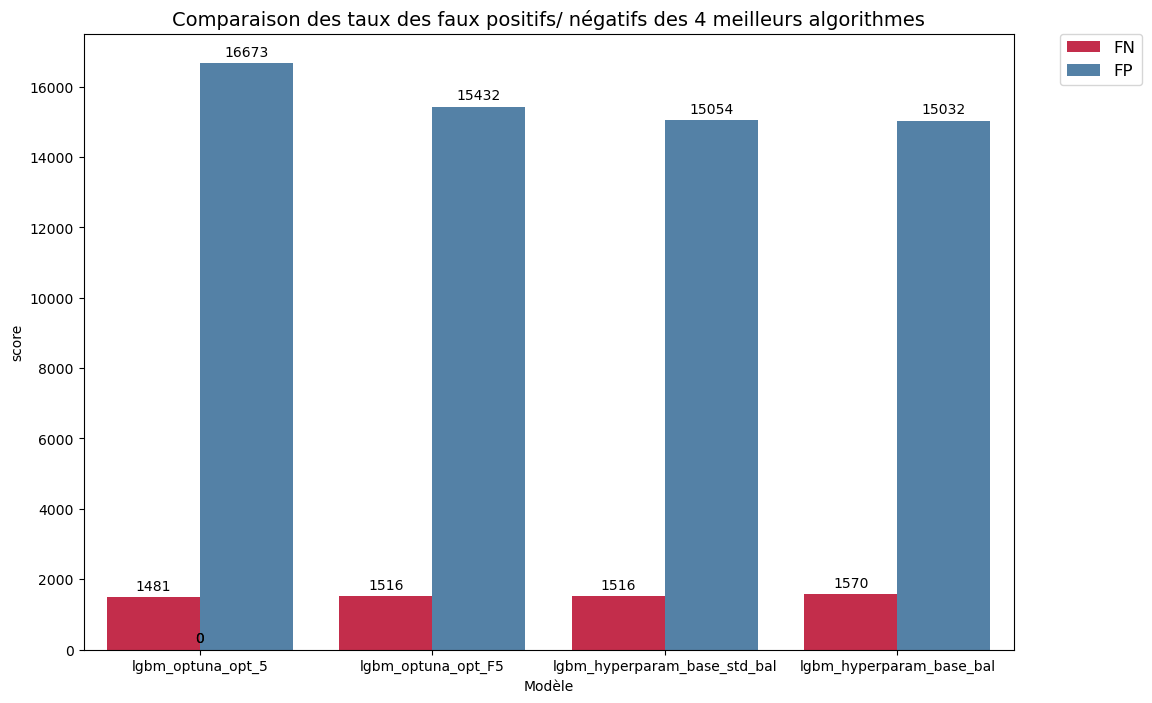

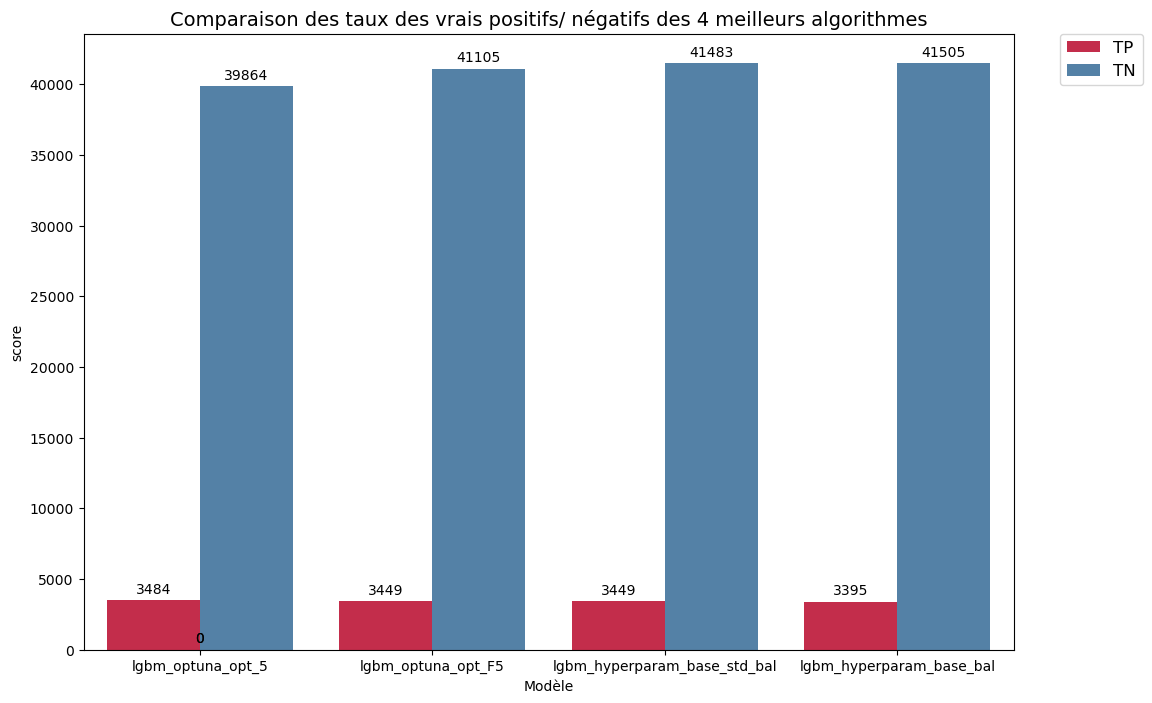

In [89]:
# Comparaison visuelle des 4 algorithmes les plus performants
df_comp_best = df_comp[df_comp['Modèle'].isin(
    ['lgbm_optuna_opt_5', 'lgbm_optuna_opt_F5',
     'lgbm_hyperparam_base_std_bal', 'lgbm_hyperparam_base_bal'])]

# Renseignements sur les modèles
df_comp_display = df_comp_best[['Modèle', 'Metrique', 'Optimisation',
                               'Class_weight']]
display(df_comp_display)

# Faux négatifs/Faux positifs
comparaison_taux_melt_false = \
    pd.melt(df_comp_best, id_vars=['Modèle'], value_name='score',
            value_vars=['FN', 'FP'])
# Visualisation
plt.figure(figsize=(12, 8))
ax= sns.barplot(x=comparaison_taux_melt_false['Modèle'],
                y=comparaison_taux_melt_false['score'],
            hue=comparaison_taux_melt_false['variable'],
            palette=['Crimson', 'SteelBlue', 'Crimson', 'SteelBlue'])
plt.title('Comparaison des taux des faux positifs/ négatifs des 4 meilleurs algorithmes', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2.,
            height + 200,
            int(height),
            ha="center") 
plt.show()

# Vrais négatifs/Vrais positifs
comparaison_taux_melt_true = \
    pd.melt(df_comp_best, id_vars=['Modèle'], value_name='score',
            value_vars=['TP', 'TN'])
# Visualisation
plt.figure(figsize=(12, 8))
total = float(len(comparaison_taux_melt_true))
ax = sns.barplot(x=comparaison_taux_melt_true['Modèle'],
                 y=comparaison_taux_melt_true['score'],
                 hue=comparaison_taux_melt_true['variable'],
                 palette=['Crimson', 'SteelBlue', 'Crimson', 'SteelBlue'])
plt.title('Comparaison des taux des vrais positifs/ négatifs des 4 meilleurs algorithmes', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=12)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2.,
            height + 500,
            int(height),
            ha="center") 
plt.show()

**Bilan** :
***
- Le modèle **lgbm_optuna_opt_5** (LightGBM class_weight='balanced' avec une optimisation bayésienne, la métrique F10-score) détecte :
    - le moins de faux négatifs (des clients détectés non défaillants mais qui ne remboursent pas le prêt) 
    - et le plus de vrais positifs (des clients détéctés défaillants qui sont défaillants),

On peut désormais tenter d'optimiser ce modèle **lgbm_otuna_opt_5** en recherchant le seuil de probabilité optimal ayant un impact sur la décision de classer en classe 0 (non-défaillant) ou 1 (défaillant).

**Bilan des différentes métriques**

Modèle Metrique Optimisation Class_weight
10             lgbm_optuna_opt_5      F10       optuna          oui
12            lgbm_optuna_opt_F5       F5       optuna          non
5   lgbm_hyperparam_base_std_bal  logloss          std          oui
1       lgbm_hyperparam_base_bal  logloss       aucune          oui

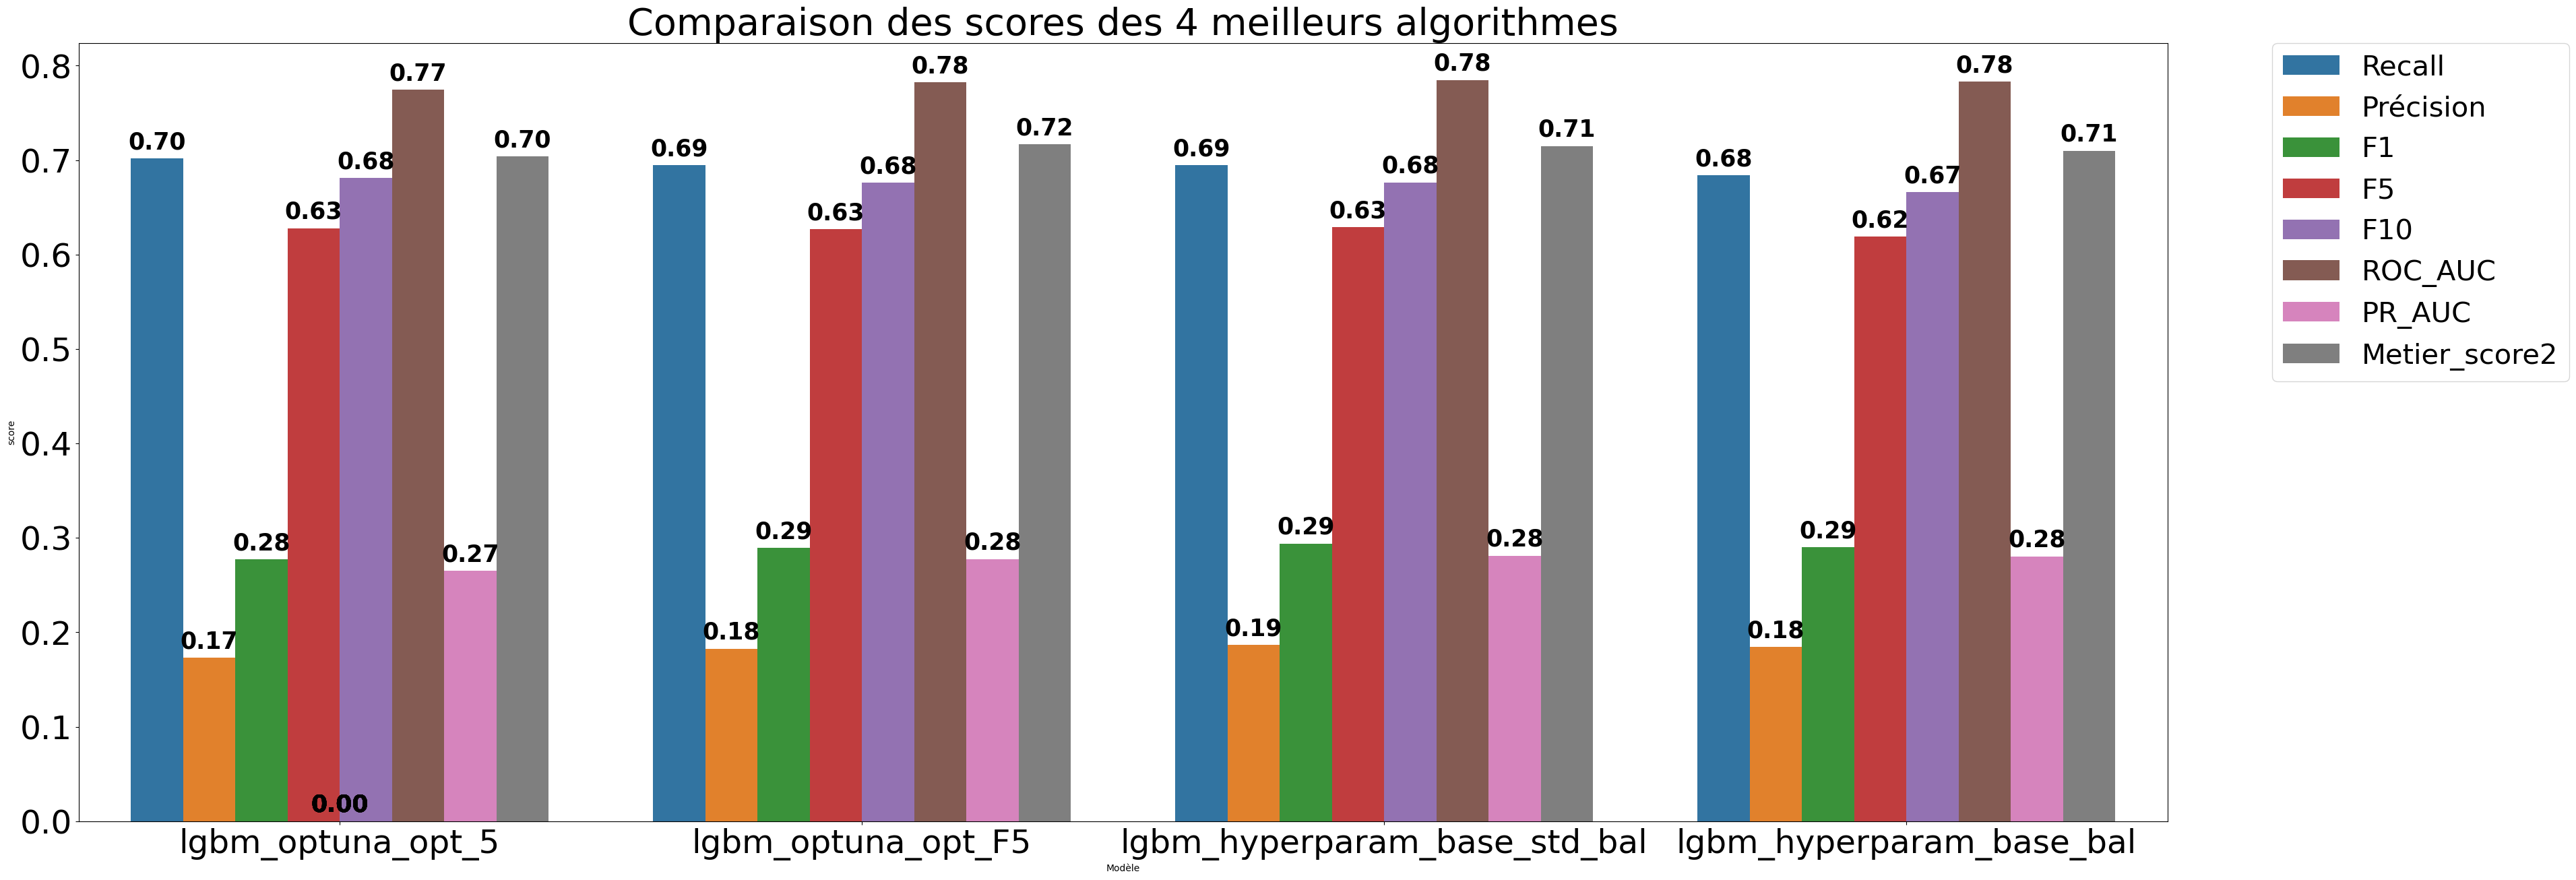

Recall  Précision        F1        F5       F10   ROC_AUC    PR_AUC  \
10  0.701712   0.172843  0.277366  0.627826  0.681079  0.774461  0.265106   
12  0.694663   0.182670  0.289273  0.627065  0.675906  0.782373  0.277606   
5   0.694663   0.186402  0.293932  0.628726  0.676402  0.784745  0.281211   
1   0.683787   0.184241  0.290270  0.619213  0.665910  0.783201  0.280375   

    Metier_score2  
10       0.703994  
12       0.716499  
5        0.714989  
1        0.709974

In [91]:
# Comparaison visuelle des 4 algorithmes les plus performants
df_comp_score = df_comp[df_comp['Modèle'].isin(
    ['lgbm_optuna_opt_5', 'lgbm_optuna_opt_F5',
     'lgbm_hyperparam_base_std_bal', 'lgbm_hyperparam_base_bal'])]

# Renseignements sur les modèles
df_comp_display = df_comp_score[['Modèle', 'Metrique', 'Optimisation',
                               'Class_weight']]
display(df_comp_display)

# Scores
comparaison_score_melt = \
    pd.melt(df_comp_score, id_vars=['Modèle'], value_name='score',
            value_vars=['Recall', 'Précision', 'F1', 'F5', 'F10',
                        'ROC_AUC', 'PR_AUC', 'Metier_score2'])
# Visualisation
plt.figure(figsize=(40, 15))
ax= sns.barplot(x=comparaison_score_melt['Modèle'],
                y=comparaison_score_melt['score'],
            hue=comparaison_score_melt['variable'])
plt.title('Comparaison des scores des 4 meilleurs algorithmes',
          fontsize=40)
plt.xticks(fontsize=35)
plt.yticks(fontsize=35)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=30)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width()/2.,
            height + 0.01,
            '{:1.2f}'.format(height),
            ha="center",
            fontsize=25,
            fontweight='bold') 
plt.show()

df_comp_score[['Recall', 'Précision', 'F1', 'F5', 'F10', 'ROC_AUC',
               'PR_AUC', 'Metier_score2']]

**Bilan** :
***
- Les différentes métriques sont proches pour tous les modèles avec un léger avantage pour le rappel pour le modèle **lgbm_otuna_opt_5** qui s'explique pour le nombre beta=10 qui favorise la détection des classes positives.

### <span style='background:PowderBlue'>Recherche de seuil de probabilité optimal</span>

In [92]:
df_res_seuil = pd.DataFrame({})

**Seuil de probabilité optimal du modèle lgbm_optuna_opt_5**

In [93]:
# Chargement du meilleur modèle
fic_lgbm_optuna_opt_5 = path + 'sauvegarde/modelisation/modele_lgbm_optuna_opt_5.pickle'
with open(fic_lgbm_optuna_opt_5, 'rb') as df_mod2:
    lgbm_optuna_opt_5 = pickle.load(df_mod2)
lgbm_optuna_opt_5

LGBMClassifier(class_weight='balanced', colsample_bytree=0.7427956029183773,
               force_col_wise=True, max_depth=6, min_child_samples=72,
               min_child_weight=0.8617347450806055, n_jobs=-1, num_leaves=6,
               objective='binary', reg_alpha=1.6642468933723128e-08,
               reg_lambda=2.482025142315579e-06, subsample=0.46934312994673416,
               subsample_freq=1, verbosity=-1)

**Première métrique métier**

In [94]:
def determiner_seuil_probabilite(model, X_valid, y_valid, title, n=1):
    '''
    Déterminer le seuil de probabilité optimal pour la métrique métier.
    Parameters
    ----------
    model : modèle entraîné, obligatoire.
    y_valid : valeur réélle.
    X_valid : données à tester.
    title : titre pour graphique.
    n : gain pour la classe 1 (par défaut) ou 0.
    Returns
    -------
    None.
    '''
    seuils = np.arange(0, 1, 0.01)
    sav_gains = []
 
    for seuil in seuils:

        # Score du modèle : n = 0 ou 1
        y_proba = model.predict_proba(X_valid)[:, n]

        # Score > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_proba > seuil)
        y_pred = np.multiply(y_pred, 1)
        
        # Sauvegarde du score de la métrique métier
        sav_gains.append(custom_score2(y_valid, y_pred))
    
    df_score = pd.DataFrame({'Seuils' : seuils,
                             'Gains' : sav_gains})
    
    # Score métrique métier maximal
    gain_max = df_score['Gains'].max()
    print(f'Score métrique métier maximal : {gain_max}')
    # Seuil optimal pour notre métrique
    seuil_max = df_score.loc[df_score['Gains'].argmax(), 'Seuils']
    print(f'Seuil maximal : {seuil_max}')

    # Affichage du gain en fonction du seuil de solvabilité
    plt.figure(figsize=(12, 6))
    plt.plot(seuils, sav_gains)
    plt.xlabel('Seuil de probabilité')
    plt.ylabel('Métrique métier')
    plt.title(title)
    plt.xticks(np.linspace(0.1, 1, 10))

Score métrique métier maximal : 0.7422728980434018
Seuil maximal : 0.68


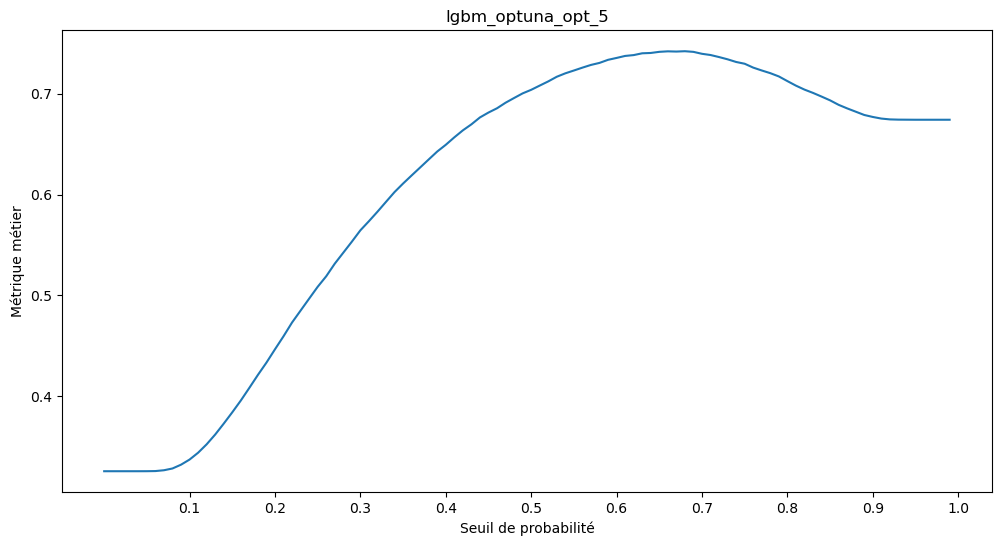

In [95]:
# taux_tn=1, taux_fp=-1, taux_fn=-10, taux_tp=1
determiner_seuil_probabilite(lgbm_optuna_opt_5,
                                          X_valid, y_valid,
                                          'lgbm_optuna_opt_5')

**Scores du modèle en prenant en compte le seuil**

In [100]:
def process_classification_seuil(model, seuil, X_train, X_valid, y_train,
                                 y_valid, df_res_seuil, titre,
                                 affiche_res=True,
                                 affiche_matrice_confusion=True):
    """
    Lance un modele de classification binaire, effectue cross-validation
    et sauvegarde des scores.
    Parameters
    ----------
    model : modèle de lassification initialisé, obligatoire.
    seuil : seuil de probabilité optimal.
    X_train : train set matrice X, obligatoire.
    X_valid : test set matrice X, obligatoire.
    y_train : train set vecteur y, obligatoire.
    y_valid : test set, vecteur y, obligatoire.
    df_res_seuil : dataframe sauvegardant les scores, obligatoire
    titre : titre à inscrire dans le tableau de sauvegarde, obligatoire.
    affiche_res : affiche le tableau de résultat (optionnel, True par défaut).
    Returns
    -------
    df_resultats : Le dataframe de sauvegarde des performances.
    y_pred : Les prédictions pour le modèle
    """
    # Top début d'exécution
    time_start = time.time()

    # Entraînement du modèle avec le jeu d'entraînement du jeu d'entrainement
    model.fit(X_train, y_train)

    # Sauvegarde du modèle de classification entraîné
    with open(path + 'sauvegarde/modelisation/modele_' + titre + '.pickle', 'wb') as f:
        pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)
    
    # Top fin d'exécution
    time_end_train = time.time()
    
    # Score du modèle : n = 0 ou 1
    # Probabilités
    y_proba = model.predict_proba(X_valid)[:, 1]

    # Prédictions avec le jeu de validation du jeu d'entraînement
    # Score > seuil de probabilité : retourne 1 sinon 0
    y_pred = (y_proba > seuil)
    y_pred = np.multiply(y_pred, 1)

    # Top fin d'exécution
    time_end = time.time()

    # Calcul des métriques
    # Rappel/recall sensibilité
    recall = recall_score(y_valid, y_pred)
    # Précision
    precision = precision_score(y_valid, y_pred)
    # F-mesure ou Fbeta
    f1_score = fbeta_score(y_valid, y_pred, beta=1)
    f5_score = fbeta_score(y_valid, y_pred, beta=5)
    f10_score = fbeta_score(y_valid, y_pred, beta=10)
    # Score ROC AUC aire sous la courbe ROC
    roc_auc = roc_auc_score(y_valid, y_proba)
    # Score PR AUC aire sous la courbe précion/rappel
    pr_auc = average_precision_score(y_valid, y_proba)
    # Métrique métier
    banque_score = custom_score(y_valid, y_pred, 10)
    banque_score2 = custom_score2(y_valid, y_pred)

    # durée d'exécution d'entraînement
    time_exec_train = time_end_train - time_start
    # durée d'exécution entraînement + validation
    time_execution = time_end - time_start

    # cross validation
    scoring = ['roc_auc', 'recall', 'precision']
    scores = cross_validate(model, X_train, y_train, cv=10,
                            scoring=scoring, return_train_score=True)

    # Préparation des nouvelles données
    new_data = pd.DataFrame({
        'Modèle': [titre],
        'Recall': [recall],
        'Précision': [precision],
        'F1': [f1_score],
        'F5': [f5_score],
        'F10': [f10_score],
        'ROC_AUC': [roc_auc],
        'PR_AUC': [pr_auc],
        'Metier_score': [banque_score],
        'Metier_score2': [banque_score2],
        'Durée_train': [time_exec_train],
        'Durée_tot': [time_execution],
        'Train_roc_auc_CV': [scores['train_roc_auc'].mean()],
        'Train_roc_auc_CV +/-': [scores['train_roc_auc'].std()],
        'Test_roc_auc_CV': [scores['test_roc_auc'].mean()],
        'Test_roc_auc_CV +/-': [scores['test_roc_auc'].std()],
        'Train_recall_CV': [scores['train_recall'].mean()],
        'Train_recall_CV +/-': [scores['train_recall'].std()],
        'Test_recall_CV': [scores['test_recall'].mean()],
        'Test_recall_CV +/-': [scores['test_recall'].std()],
        'Train_precision_CV': [scores['train_precision'].mean()],
        'Train_precision_CV +/-': [scores['train_precision'].std()],
        'Test_precision_CV': [scores['test_precision'].mean()],
        'Test_precision_CV +/-': [scores['test_precision'].std()],
    })

    # Utilisation de concat pour ajouter les nouvelles données
    df_res_seuil = pd.concat([df_res_seuil, new_data], ignore_index=True)

    # Sauvegarde du tableau de résultat et autres étapes...
    with open(path + 'sauvegarde/modelisation/df_res_seuil.pickle', 'wb') as df:
        pickle.dump(df_res_seuil, df, pickle.HIGHEST_PROTOCOL)

    if affiche_res:
        mask = df_res_seuil['Modèle'] == titre
        display(df_res_seuil[mask])

    if affiche_matrice_confusion:
        afficher_matrice_confusion(y_valid, y_pred, titre)

    return df_res_seuil

Modèle    Recall  Précision        F1        F5       F10  \
0  lgbm_optuna_opt_5_seuil  0.417925   0.266401  0.325388  0.408979  0.415585   

    ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  Test_roc_auc_CV  \
0  0.774461  0.265106         34614       0.742273  ...         0.776083   

   Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  Test_recall_CV  \
0             0.005094         0.720365             0.001498        0.709567   

   Test_recall_CV +/-  Train_precision_CV  Train_precision_CV +/-  \
0            0.010643            0.176237                0.000487   

   Test_precision_CV  Test_precision_CV +/-  
0           0.173451               0.002472  

[1 rows x 24 columns]

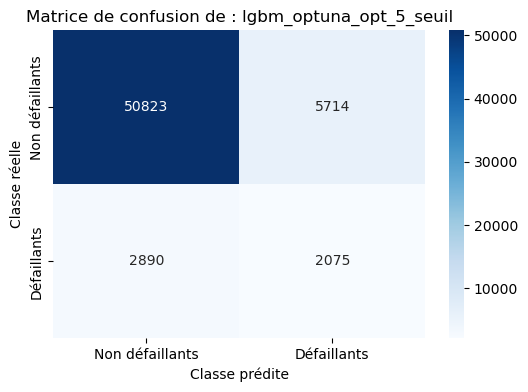

In [101]:
df_res_seuil = process_classification_seuil(lgbm_optuna_opt_5, 0.68,
                                             X_train, X_valid, y_train,
                                             y_valid, df_res_seuil,
                                            'lgbm_optuna_opt_5_seuil')

**Bilan** :
- La métrique métier n'est pas efficace puisqu'on détecte plus de vrais négatifs (prédits non-défaillants mais défaillants).

**Deuxième métrique métier**

In [103]:
def determiner_seuil_probabilite_F10(model, X_valid, y_valid, title, n=1):
    '''
    Déterminer le seuil de probabilité optimal pour la métrique métier.
    Parameters
    ----------
    model : modèle entraîné, obligatoire.
    y_valid : valeur réélle.
    X_valid : données à tester.
    title : titre pour graphique.
    n : gain pour la classe 1 (par défaut) ou 0.
    Returns
    -------
    None.
    '''
    seuils = np.arange(0, 1, 0.01)
    scores_F10 = []
 
    for seuil in seuils:

        # Score du modèle : n = 0 ou 1
        y_proba = model.predict_proba(X_valid)[:, n]

        # Score > seuil de solvabilité : retourne 1 sinon 0
        y_pred = (y_proba > seuil)
        y_pred = np.multiply(y_pred, 1)
        
        # Sauvegarde du score de la métrique métier
        scores_F10.append(fbeta_score(y_valid, y_pred, beta=10))
    
    df_score = pd.DataFrame({'Seuils' : seuils,
                             'Gains' : scores_F10})
    
    # Score métrique métier maximal
    gain_max = df_score['Gains'].max()
    print(f'Score F10 maximal : {gain_max}')
    # Seuil optimal pour notre métrique
    seuil_max = df_score.loc[df_score['Gains'].argmax(), 'Seuils']
    print(f'Seuil maximal : {seuil_max}')

    # Affichage du gain en fonction du seuil de solvabilité
    plt.figure(figsize=(12, 6))
    plt.plot(seuils, scores_F10)
    plt.xlabel('Seuil de probabilité')
    plt.ylabel('Score F10')
    plt.title(title)
    plt.xticks(np.linspace(0.1, 1, 10))

Score F10 maximal : 0.8999028758444506
Seuil maximal : 0.1


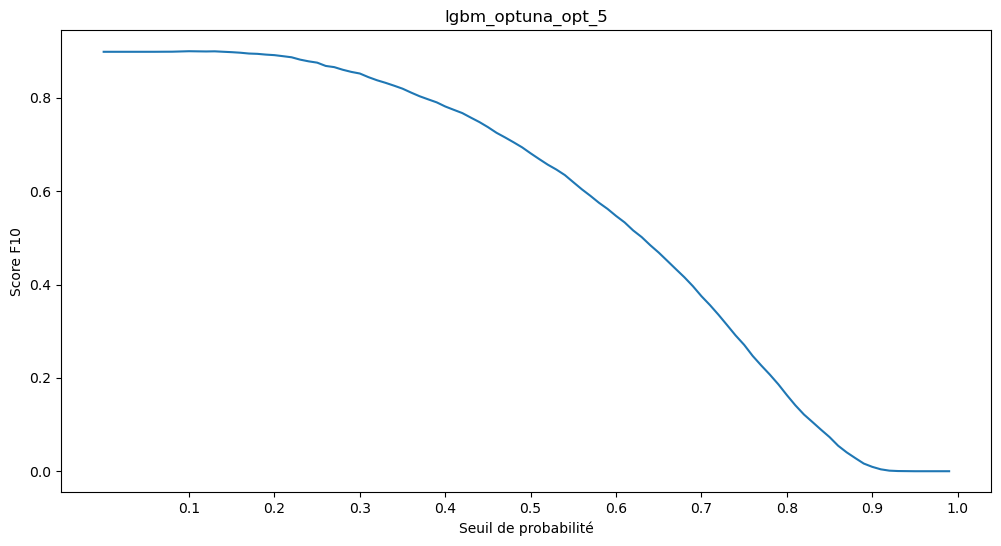

In [104]:
# Score F10 en fonction du seuil
determiner_seuil_probabilite_F10(lgbm_optuna_opt_5,
                                              X_valid, y_valid,
                                             'lgbm_optuna_opt_5')

**Scores du modèle en prenant en compte le seuil**

Modèle    Recall  Précision        F1        F5  \
1  lgbm_optuna_opt_5_seuil_1  0.999597   0.082007  0.151579  0.698848   

        F10   ROC_AUC    PR_AUC  Metier_score  Metier_score2  ...  \
1  0.899903  0.774461  0.265106         55576       0.337261  ...   

   Test_roc_auc_CV  Test_roc_auc_CV +/-  Train_recall_CV  Train_recall_CV +/-  \
1         0.776083             0.005094         0.720365             0.001498   

   Test_recall_CV  Test_recall_CV +/-  Train_precision_CV  \
1        0.709567            0.010643            0.176237   

   Train_precision_CV +/-  Test_precision_CV  Test_precision_CV +/-  
1                0.000487           0.173451               0.002472  

[1 rows x 24 columns]

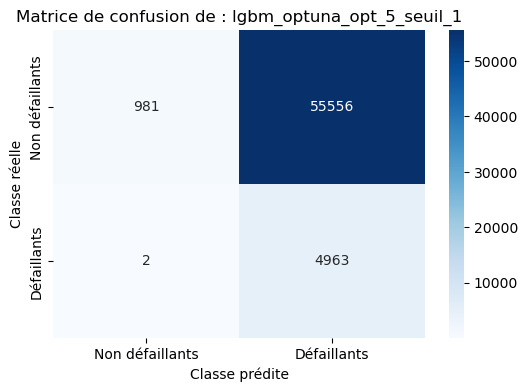

In [105]:
df_res_seuil = process_classification_seuil(lgbm_optuna_opt_5, 0.1,
                                              X_train, X_valid, y_train,
                                              y_valid, df_res_seuil,
                                             'lgbm_optuna_opt_5_seuil_1')

- Le taux de FN est très faible mais cela signifie que le prêt n'est plus accordé à personne ! Ce n'est pas le but de la banque qui doit gagner de l'argent avec les intérêts des prêts accordés.
- Le compromis faux négatifs et faux positifs devra être discuté avec nos clients pour régler au mieux le seuil de probabilité avec le nombre de faux négatifs/positifs à atteindre. 
- Sans client disponible et sans consigne dans le projet, le seuil par défaut à 0.5 sera conservé et le modèle final sera **lgbm_optuna_opt_5**.

In [106]:
# Sauvegarde du meilleur modèle dans best_model
fic_best_model = path + 'sauvegarde/modelisation/best_model.pickle'
with open(fic_best_model, 'wb') as f:
    pickle.dump(lgbm_optuna_opt_5, f, pickle.HIGHEST_PROTOCOL)

## <span style='background:Thistle'>Interprétabilité du modèle</span>

In [107]:
# Chargement du meilleur modèle
fic_best_model = path + 'sauvegarde/modelisation/best_model.pickle'
with open(fic_best_model, 'rb') as df_best_model:
    best_model = pickle.load(df_best_model)
best_model

LGBMClassifier(class_weight='balanced', colsample_bytree=0.7427956029183773,
               force_col_wise=True, max_depth=6, min_child_samples=72,
               min_child_weight=0.8617347450806055, n_jobs=-1, num_leaves=6,
               objective='binary', reg_alpha=1.6642468933723128e-08,
               reg_lambda=2.482025142315579e-06, subsample=0.46934312994673416,
               subsample_freq=1, verbosity=-1)

### <span style='background:PowderBlue'>LightGBM - Features importances</span>

**Features importances**

In [111]:
def plot_features_importance(features_importance, nom_variables, figsize=(10, 12)):
    '''
    Affiche la liste des variables avec leurs importances par ordre décroissant.
    Parameters
    ----------
    features_importance: les features importances, obligatoire
    nom_variables : nom des variables, obligatoire
    figsize : taille du graphique, plus grande pour une meilleure lisibilité
    Returns
    -------
    None.
    '''
    df_feat_imp = pd.DataFrame({'feature': nom_variables,
                                'importance': features_importance})
    df_feat_imp_tri = df_feat_imp.sort_values(by='importance', ascending=True)
    
    # BarGraph de visualisation
    plt.figure(figsize=figsize)
    plt.barh(df_feat_imp_tri['feature'], df_feat_imp_tri['importance'], color='skyblue')
    plt.yticks(fontsize=8)  # Taille de police réduite
    plt.xlabel('Feature Importances', fontsize=14)
    plt.ylabel('Variables', fontsize=14)
    plt.title('Comparaison des Features Importances', fontsize=18)
    plt.tight_layout()  # Ajustement de l'espace pour que tout s'affiche correctement
    plt.show()


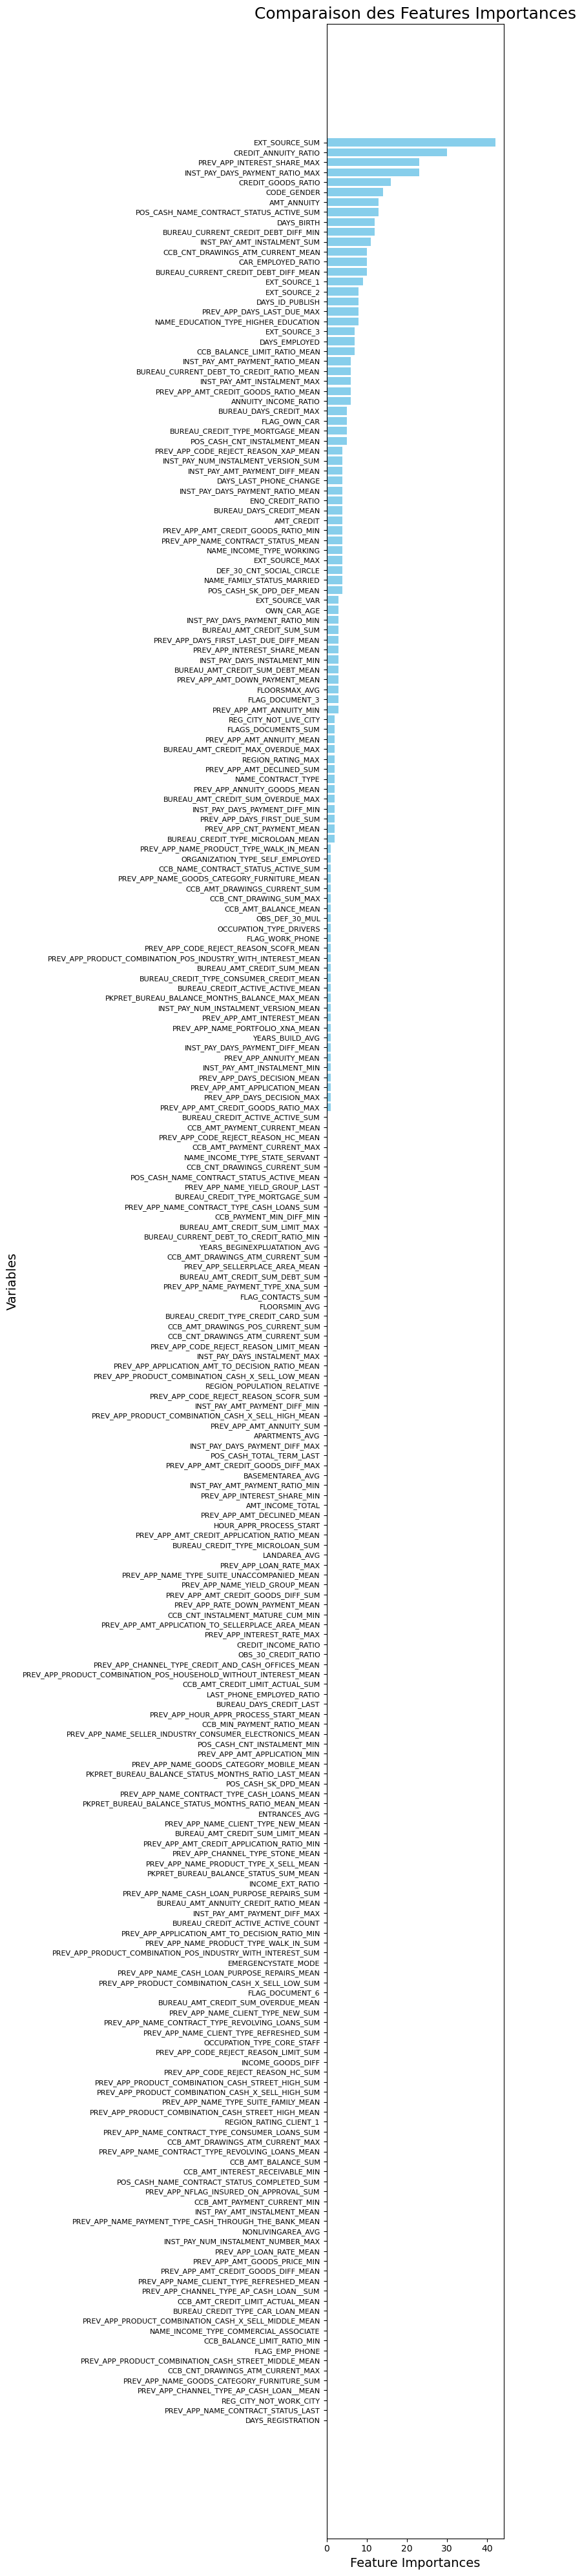

In [112]:
feature_importance_values = best_model.feature_importances_
feature_names = list(X_train.columns)
plot_features_importance(feature_importance_values,
                                      feature_names, (8, 40))

**Répartition des features importances**

In [116]:
def plot_cumultative_feature_importance(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d variables nécessaires pour %0.2f de cummulative imortance' % (importance_index + 1, threshold))
    
    return df

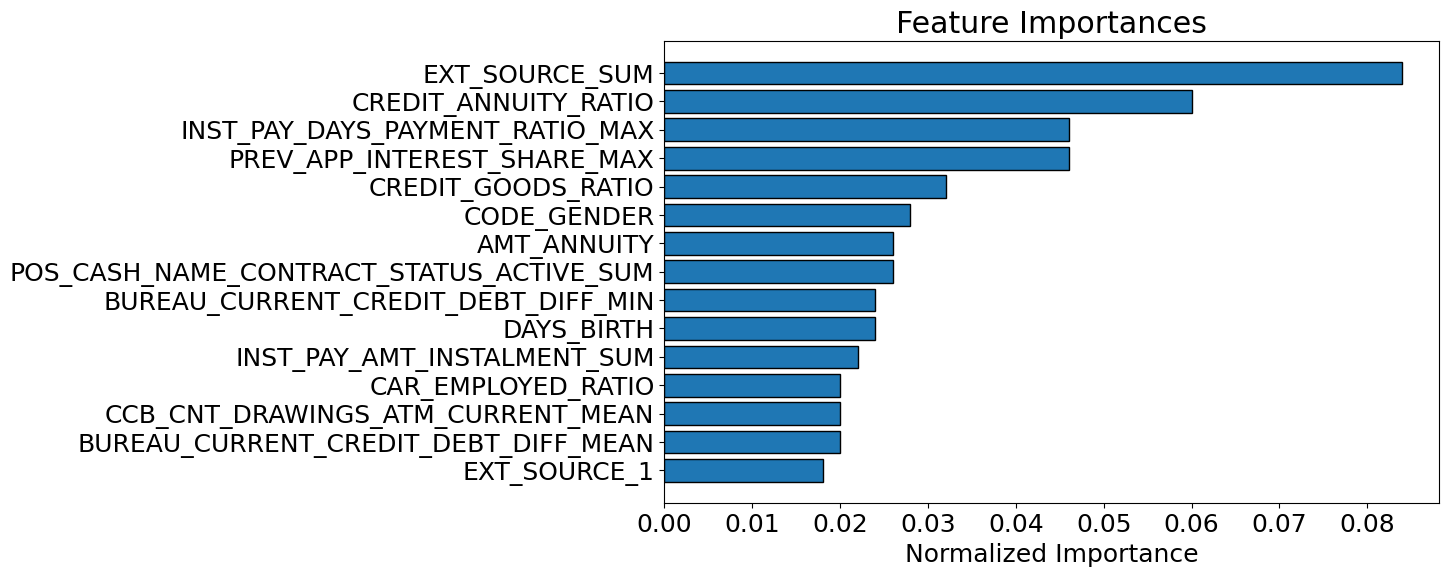

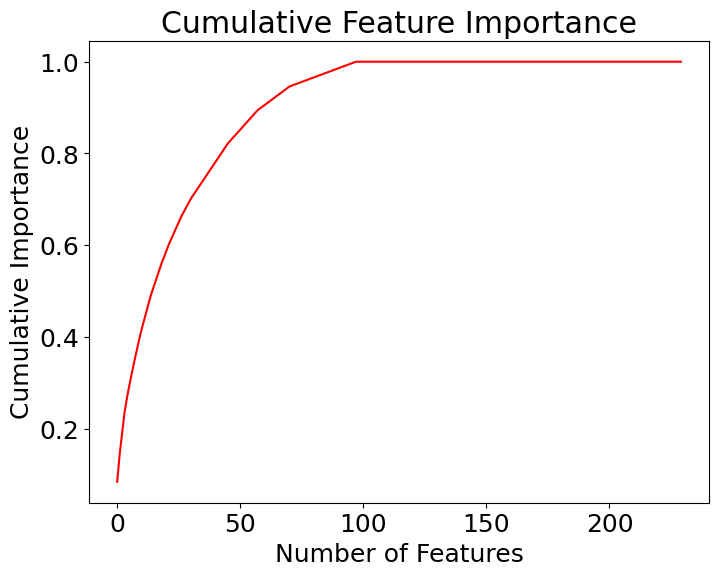

60 variables nécessaires pour 0.90 de cummulative imortance


In [118]:
# Impact des features importance cumulées
feature_importance_values = best_model.feature_importances_
feature_names = list(X_train.columns)
feature_importances = pd.DataFrame({'feature': feature_names,
                                    'importance': feature_importance_values})
# Show the feature importances for the new features
df_featimp = plot_cumulative_feature_importance(feature_importances)

In [115]:
df_featimp

index                                            feature  importance  \
0       55                                     EXT_SOURCE_SUM          42   
1       57                               CREDIT_ANNUITY_RATIO          30   
2       73                    INST_PAY_DAYS_PAYMENT_RATIO_MAX          23   
3        9                        PREV_APP_INTEREST_SHARE_MAX          23   
4        1                                 CREDIT_GOODS_RATIO          16   
..     ...                                                ...         ...   
225    130   PREV_APP_PRODUCT_COMBINATION_CASH_X_SELL_LOW_SUM           0   
226    132       PREV_APP_NAME_CASH_LOAN_PURPOSE_REPAIRS_MEAN           0   
227    133                                EMERGENCYSTATE_MODE           0   
228    134  PREV_APP_PRODUCT_COMBINATION_POS_INDUSTRY_WITH...           0   
229    229              PREV_APP_CODE_REJECT_REASON_SCOFR_SUM           0   

     importance_normalized  cumulative_importance  
0                    0.084                  0.084  
1                    0.060                  0.144  
2                    0.046                  0.190  
3                    0.046                  0.236  
4                    0.032                  0.268  
..                     ...                    ...  
225                  0.000                  1.000  
226                  0.000                  1.000  
227                  0.000                  1.000  
228                  0.000                  1.000  
229                  0.000                  1.000  

[230 rows x 5 columns]

- 60 variables sont nécessaires pour représenter 90% des features importances et 31 variables pour 70%.

**Arbre de décision de LightGBM**

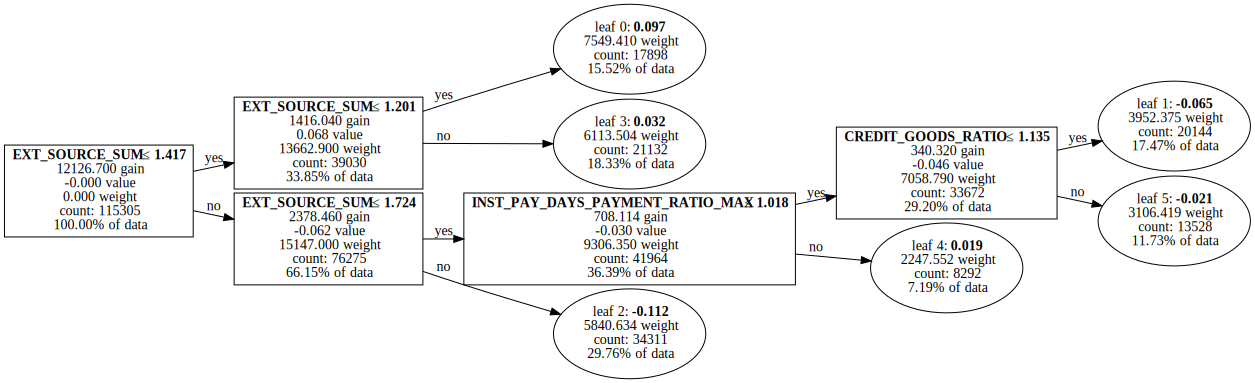

In [122]:
import lightgbm as lgb

lgb.create_tree_digraph(best_model, tree_index=0,
                        show_info=['split_gain', 'internal_value',
                                   'internal_count', 'internal_weight',
                                   'leaf_count', 'leaf_weight', 'data_percentage'])

### <span style='background:PowderBlue'>SHAP</span>

**Interprétabilité globale**

**Summary plot**

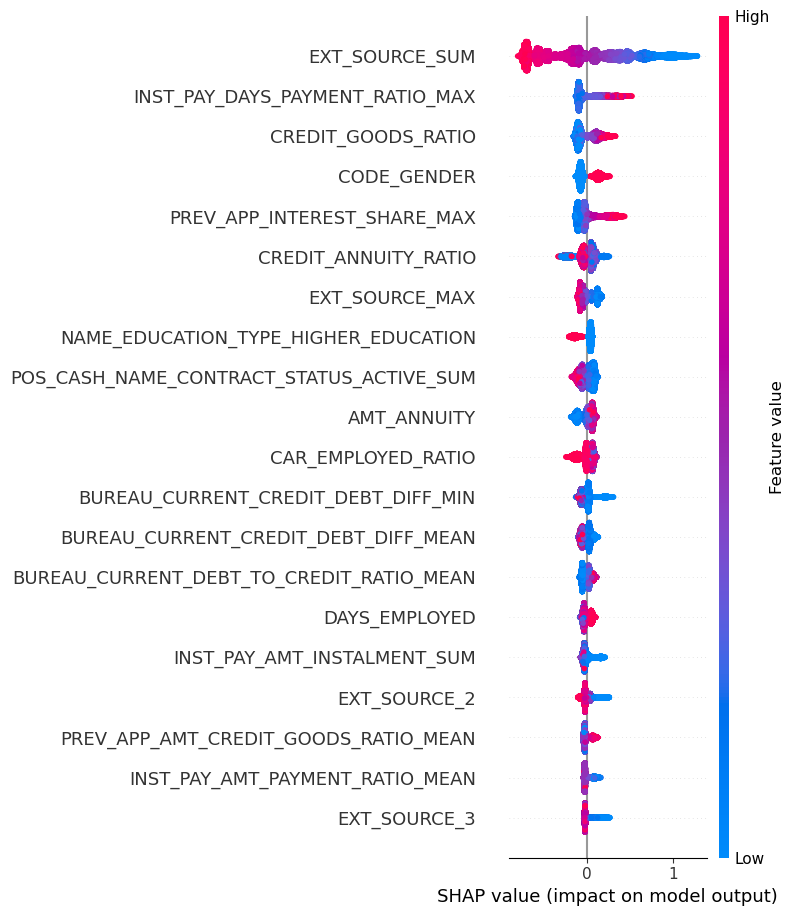

In [124]:
# Interprétation
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_valid)
# Summary plot
shap.summary_plot(shap_values, X_valid)

**Bar plot** : l'importance globale des caractéristiques, où l'importance globale de chaque caractéristique est considérée comme la valeur absolue moyenne pour cette caractéristique sur tous les échantillons donnés.

In [126]:
explainer = shap.Explainer(best_model, X_train)
shap_values = explainer(X_train, check_additivity=False)

100%|===================| 245189/246005 [04:52<00:00]        

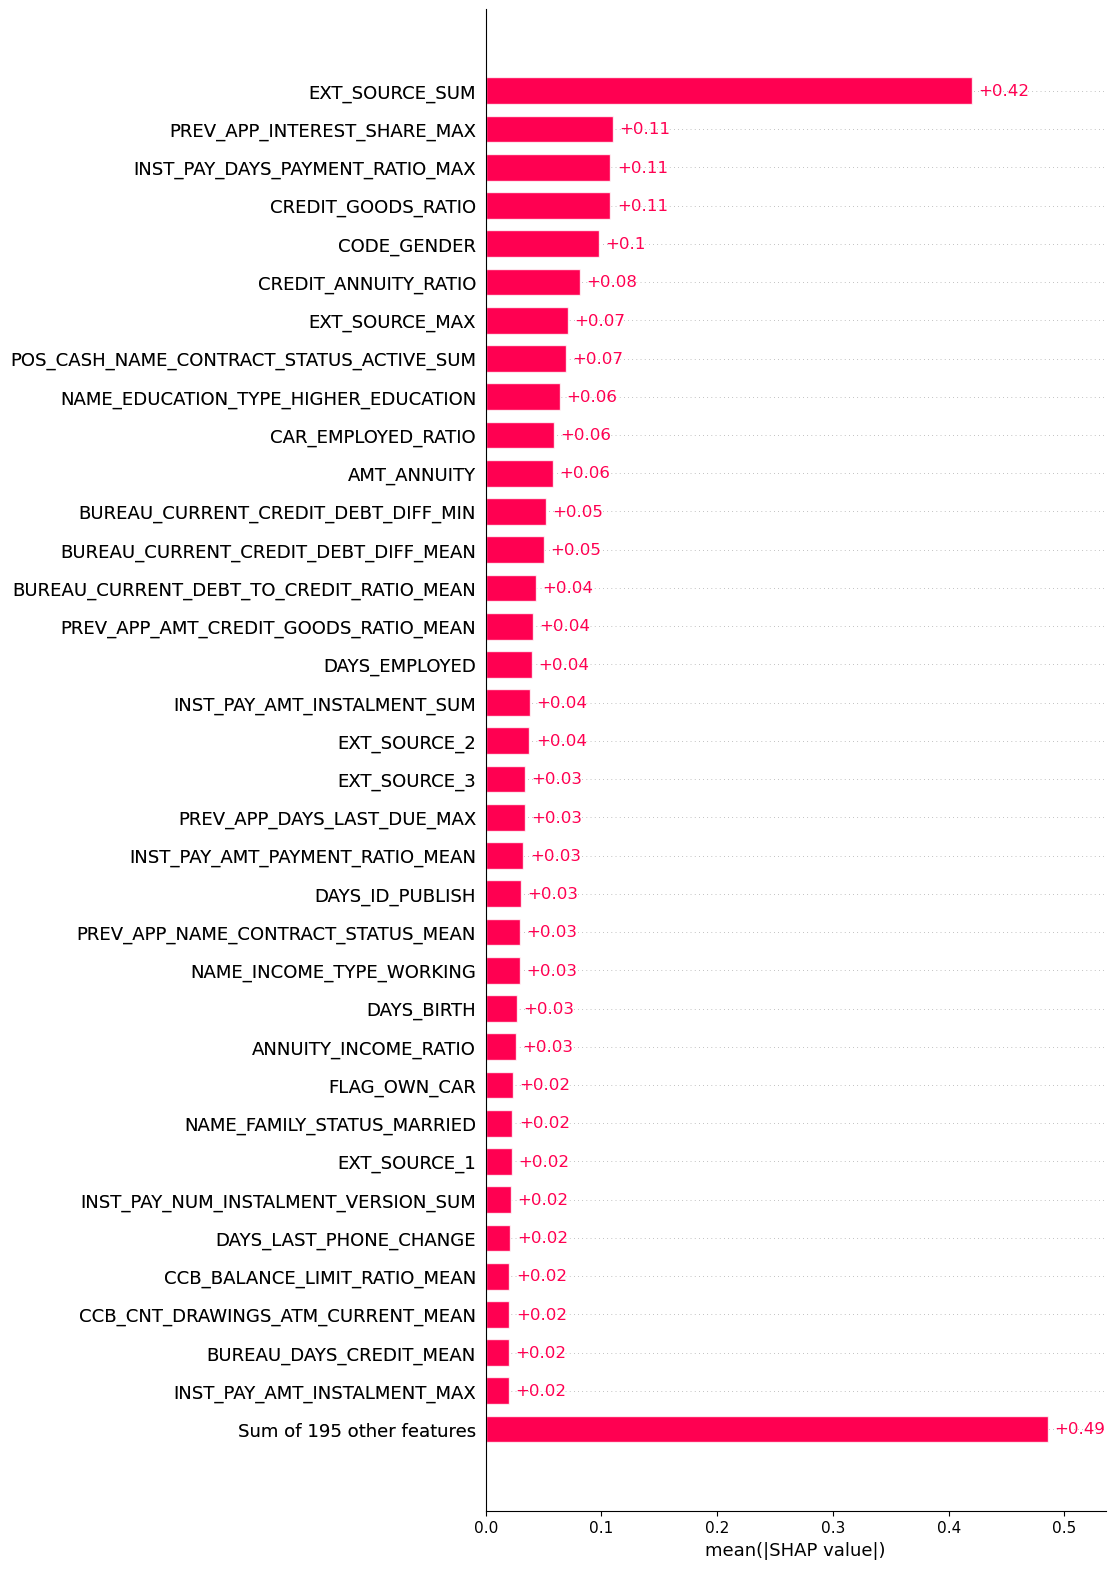

In [127]:
shap.plots.bar(shap_values, max_display=36)

**Beeswarm** : 
- ce graphique est conçu pour afficher un résumé dense en informations de la manière dont les principales caractéristiques d'un ensemble de données influencent la sortie du modèle. 
- Chaque instance de l'explication donnée est représentée par un seul point sur chaque graphique de caractéristiques. La position x du point est déterminée par la valeur SHAP (shap_values.value[instance,feature]) de cette caractéristique, et les points s'empilent le long de chaque ligne de caractéristique pour montrer la densité. 
- La couleur est utilisée pour afficher la valeur originale d'une caractéristique (shap_values.data[instance,feature]). 

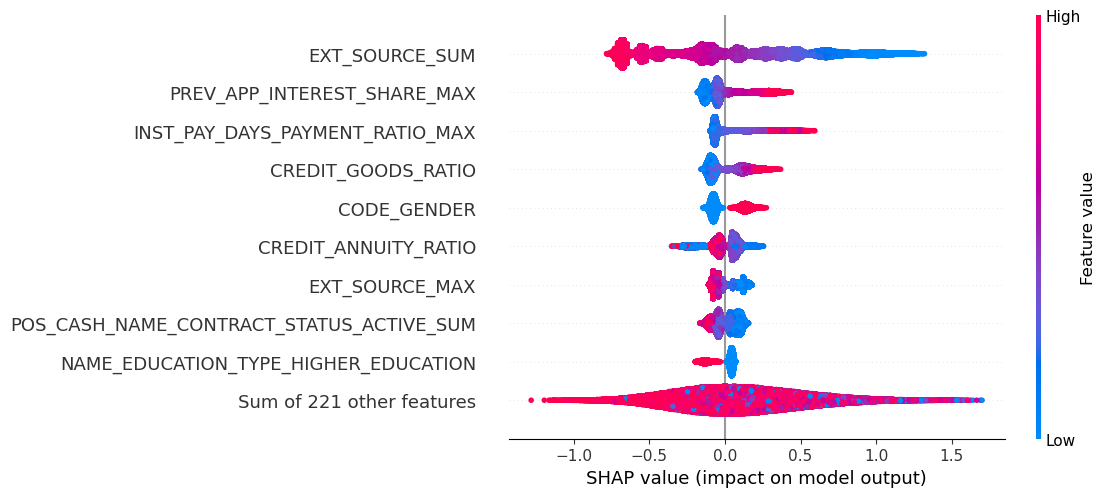

In [128]:
shap.plots.beeswarm(shap_values)

- Dans le graphique ci-dessous, nous pouvons voir que la variable EXT_SOURCE_SUM est la caractéristique la plus importante en moyenne, et que les hautes valeurs (en rouge) ont tendance avoir un impact négatif donc classe 1 défaillant alors que les basses valeurs ont tendance à avoir un impact positif donc classe 0 non-défaillant...

***
Le meilleur modèle est sélectionné et extrait. La suite concernera la préparation des données nécessaires au dashboard
***